In [18]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [19]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [20]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [21]:
%matplotlib inline

# Data

In [22]:
# Read data
motion_01 = np.genfromtxt('../dataset2/motion_01.csv', delimiter=',')
print("Motion 0.1 data has a length of ", len(motion_01))

Motion 0.1 data has a length of  121979


## Visualizations

In [23]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [24]:
"""
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]
"""

def get_specific_cmd(dataset, fwd, side, rot):
    idxs = []
    for row_id, item in enumerate(motion_01):
        if np.isclose(item[2], fwd, 0.01) and np.isclose(item[3], side, 0.01) and np.isclose(item[4], rot, 0.01):
            idxs.append(row_id)
    
    return idxs

In [25]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_01

In [26]:
velocity = 0.1

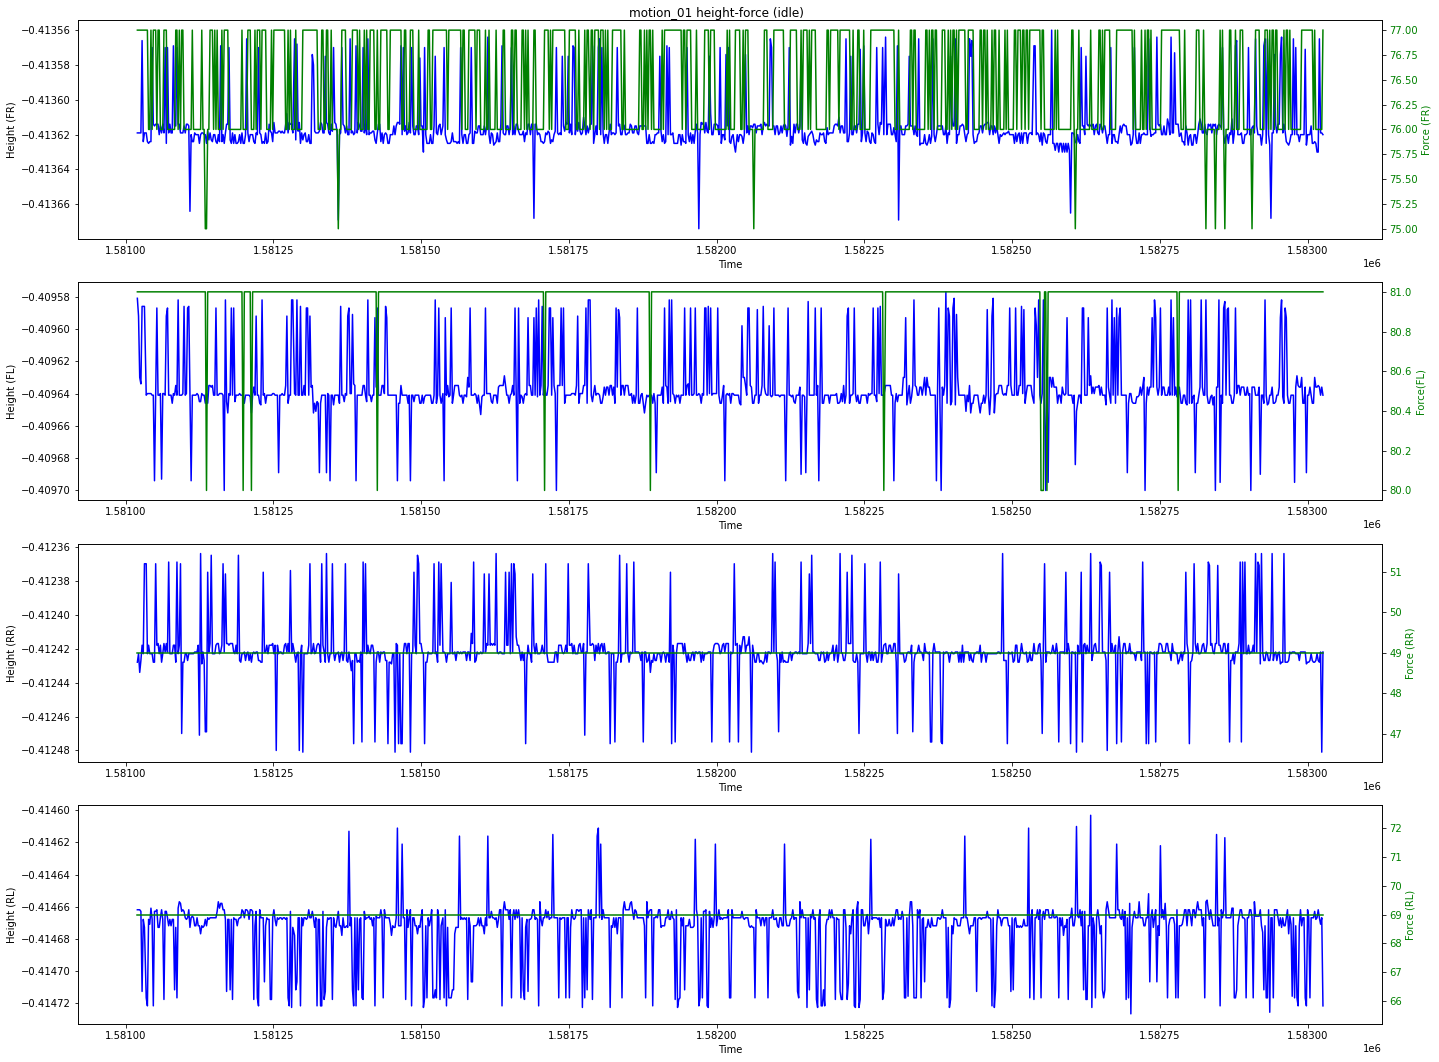

In [27]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_01 height-force (idle)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

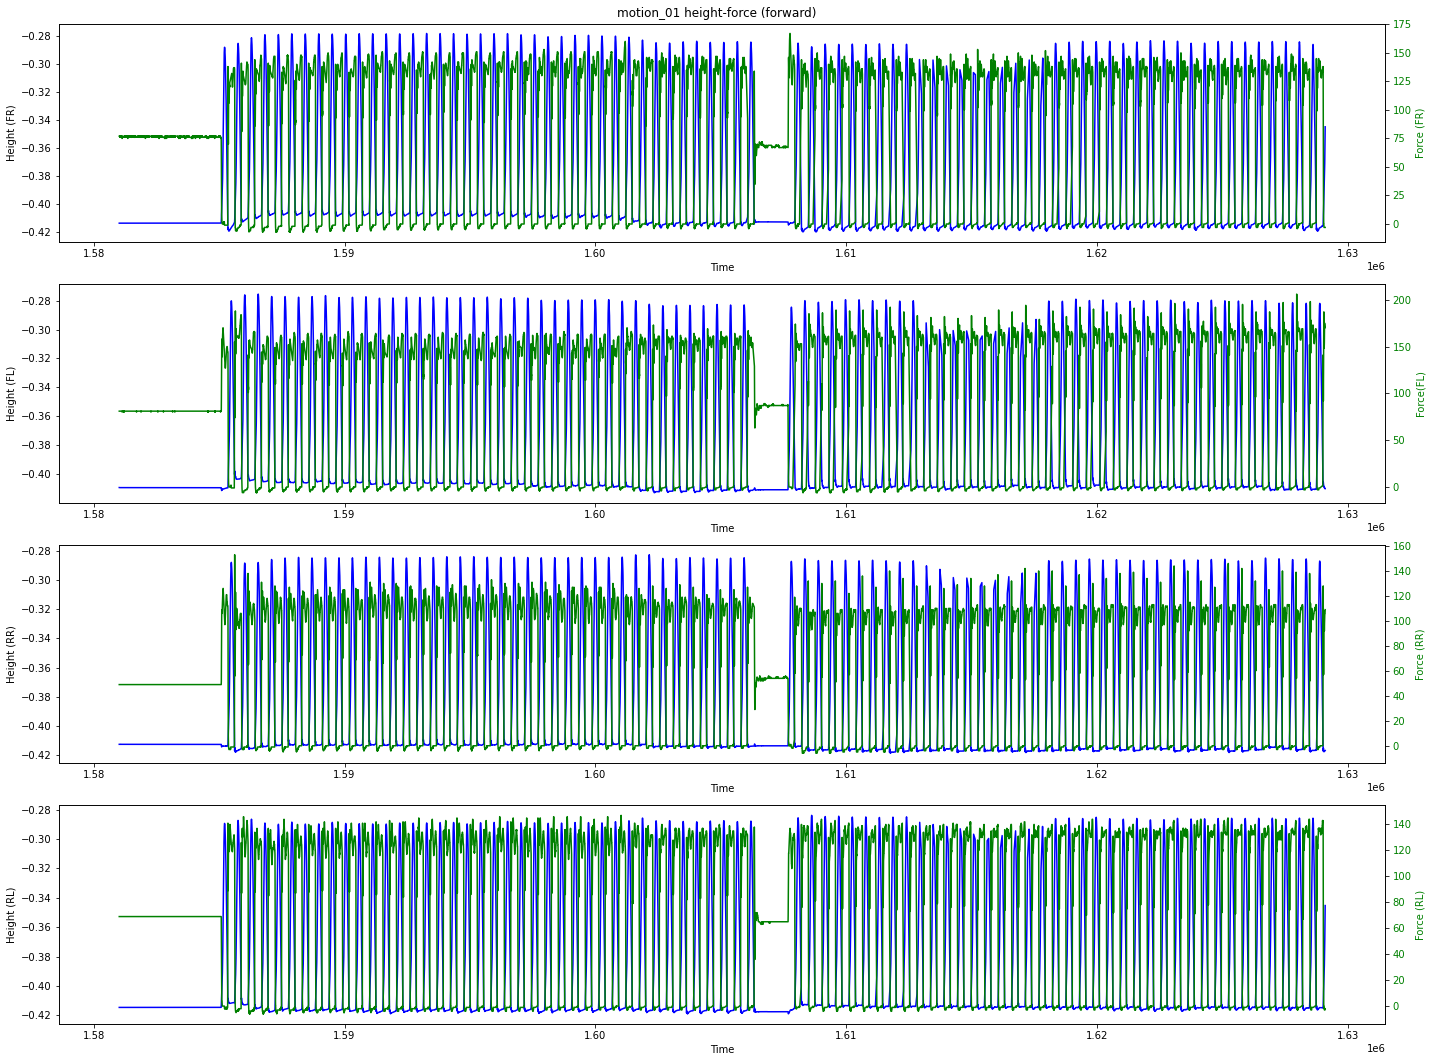

In [28]:
# Forward
fwd_cmds = get_specific_cmd(motion_01, velocity, 0, 0)
motion_01_fwd = motion_01[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_01 height-force (forward)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

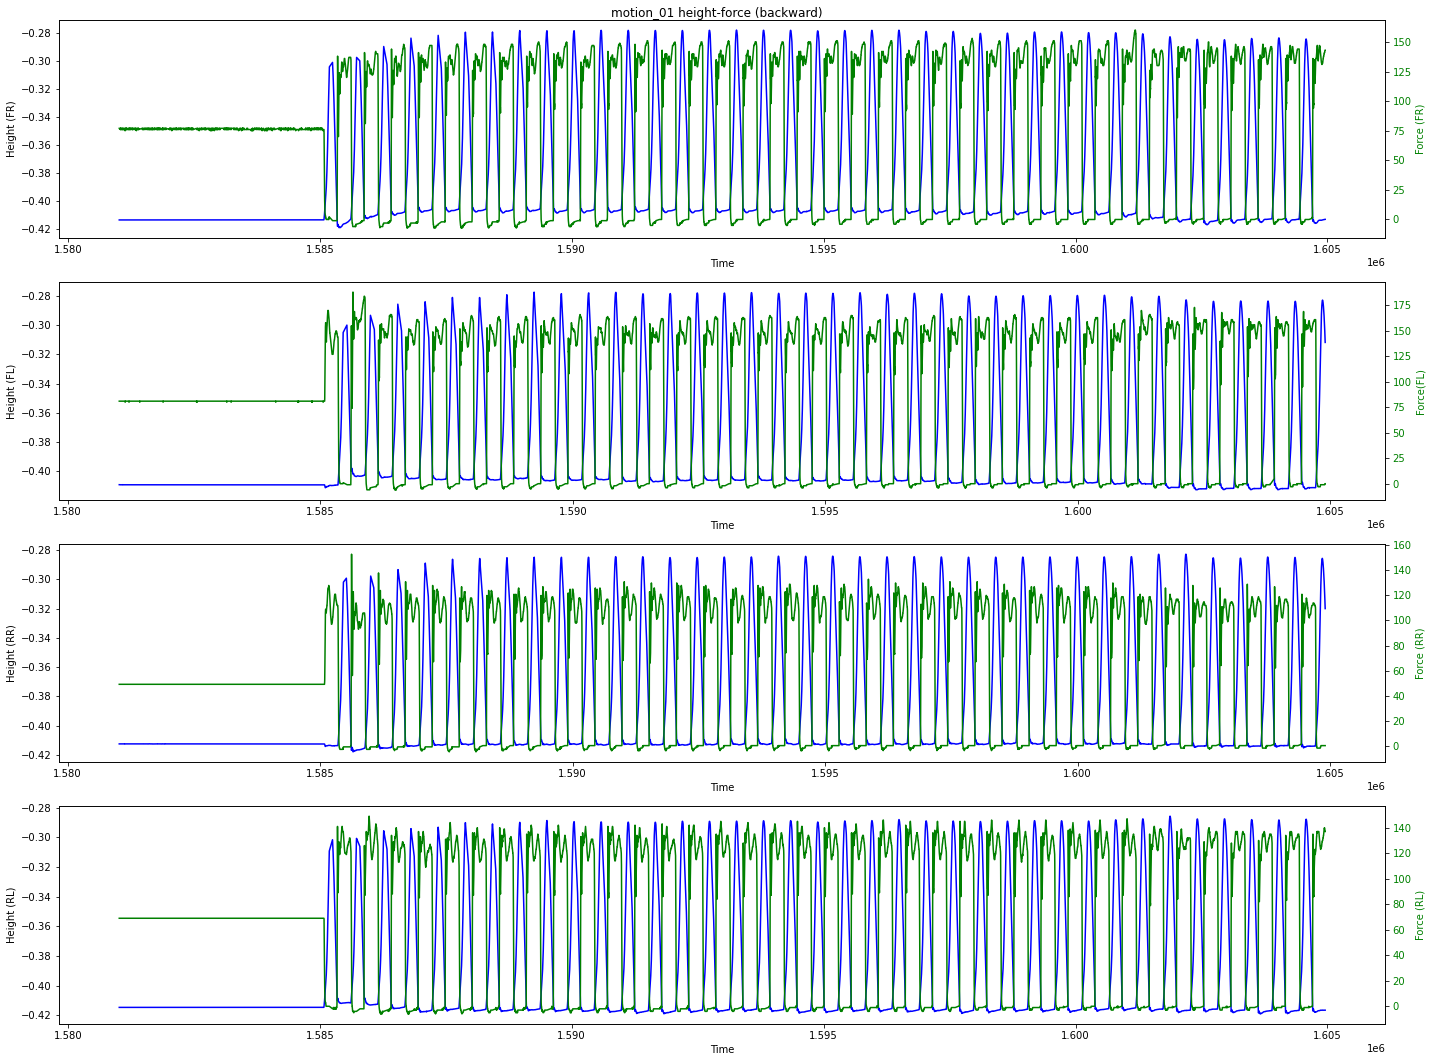

In [29]:
# Backwards
bwd_cmds = get_specific_cmd(motion_01, -velocity, 0, 0)
motion_01_bwd = motion_01[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_01 height-force (backward)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

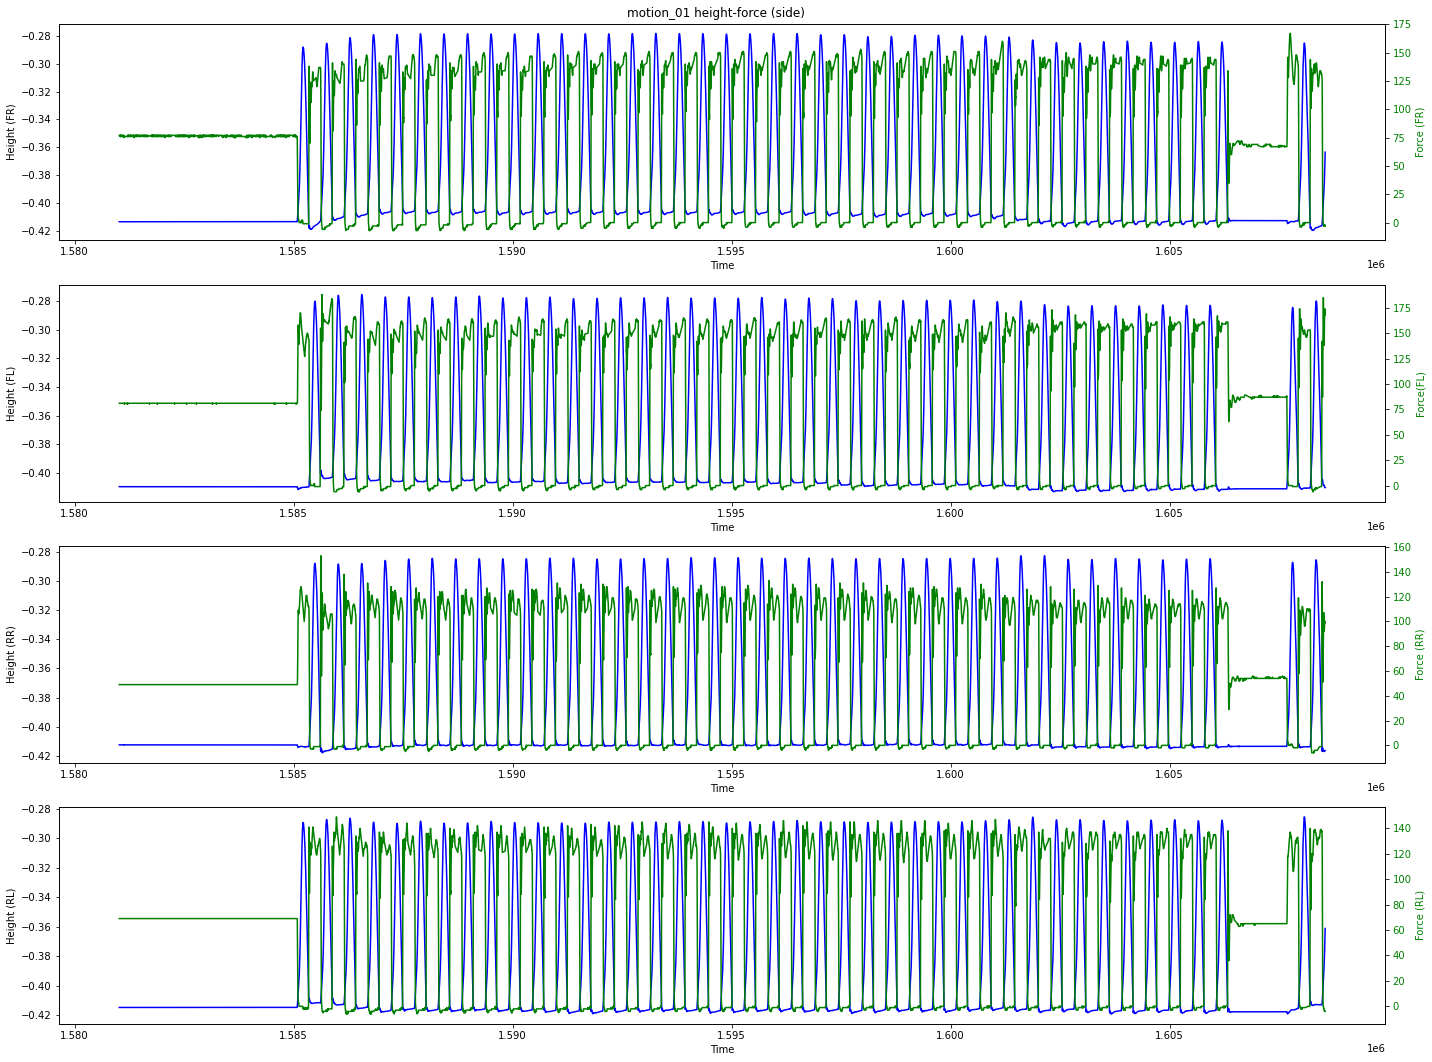

In [30]:
# Side (right)
side_cmds = get_specific_cmd(motion_01, 0, velocity, 0)
motion_01_side = motion_01[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_01 height-force (side)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

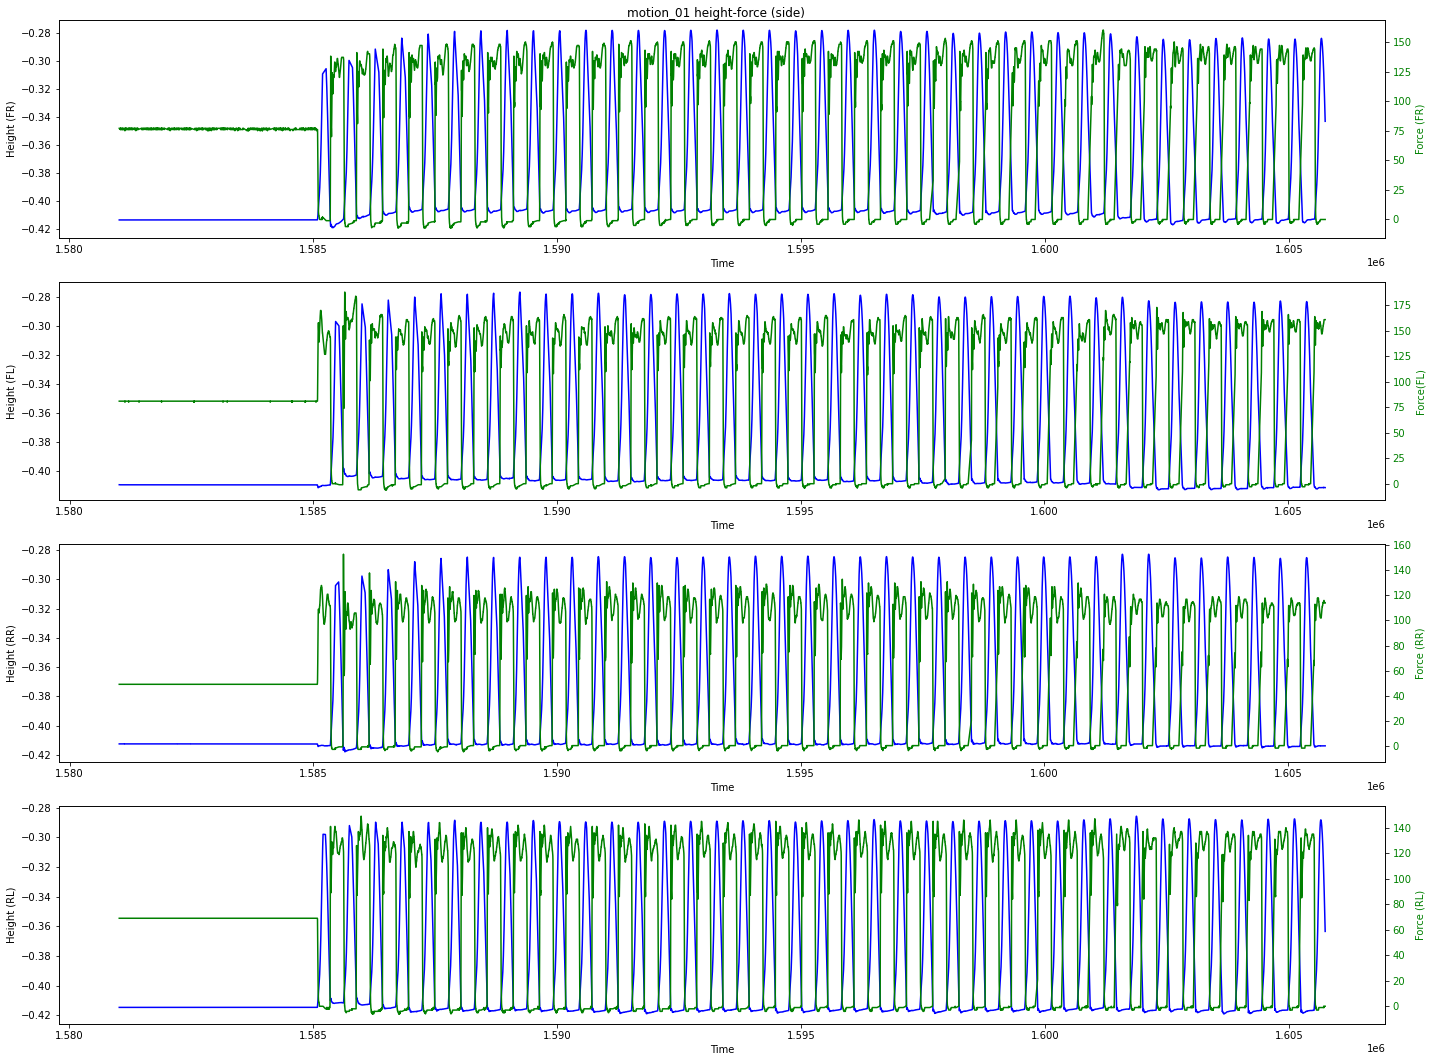

In [31]:
# Side (left)
side_cmds = get_specific_cmd(motion_01, 0, -velocity, 0)
motion_01_side = motion_01[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_01 height-force (side)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

In [32]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_01, 0, 0, velocity)
motion_01_rot = motion_01[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_01 height-force (rotation)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

KeyboardInterrupt: 

In [ ]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_01, 0, 0, -velocity)
motion_01_rot = motion_01[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_01 height-force (rotation)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [33]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(dataset[:, 58] > force_thresholds[0], 
                                                   dataset[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(dataset[:, 56] > force_thresholds[2], 
                                                    dataset[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(dataset[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

## Footsteps

In [34]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_01_cmds = motion_01[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_01_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_01_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_01_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_01_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [34, 56, 37, 57, 40, 58, 43, 59],
                           True,
                           motion_01_cmds[footsteps_nms(motion_01_cmds, footsteps), 0])
    
    return motion_01_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  20580 20583 21274 21431
Min and max diff between front and rear feet 6.6e-05 0.264176 

Amount of footsteps found with height criteria:  9796 

Intersection with motion commands:  9796 

Intersection with no motion commands:  0 

Number of force footsteps:  688 

Number of height-force footsteps:  688 

Number of footsteps extracted with height-force due to motion:  688 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  688
Footsteps after non-maximum-suppression:  179


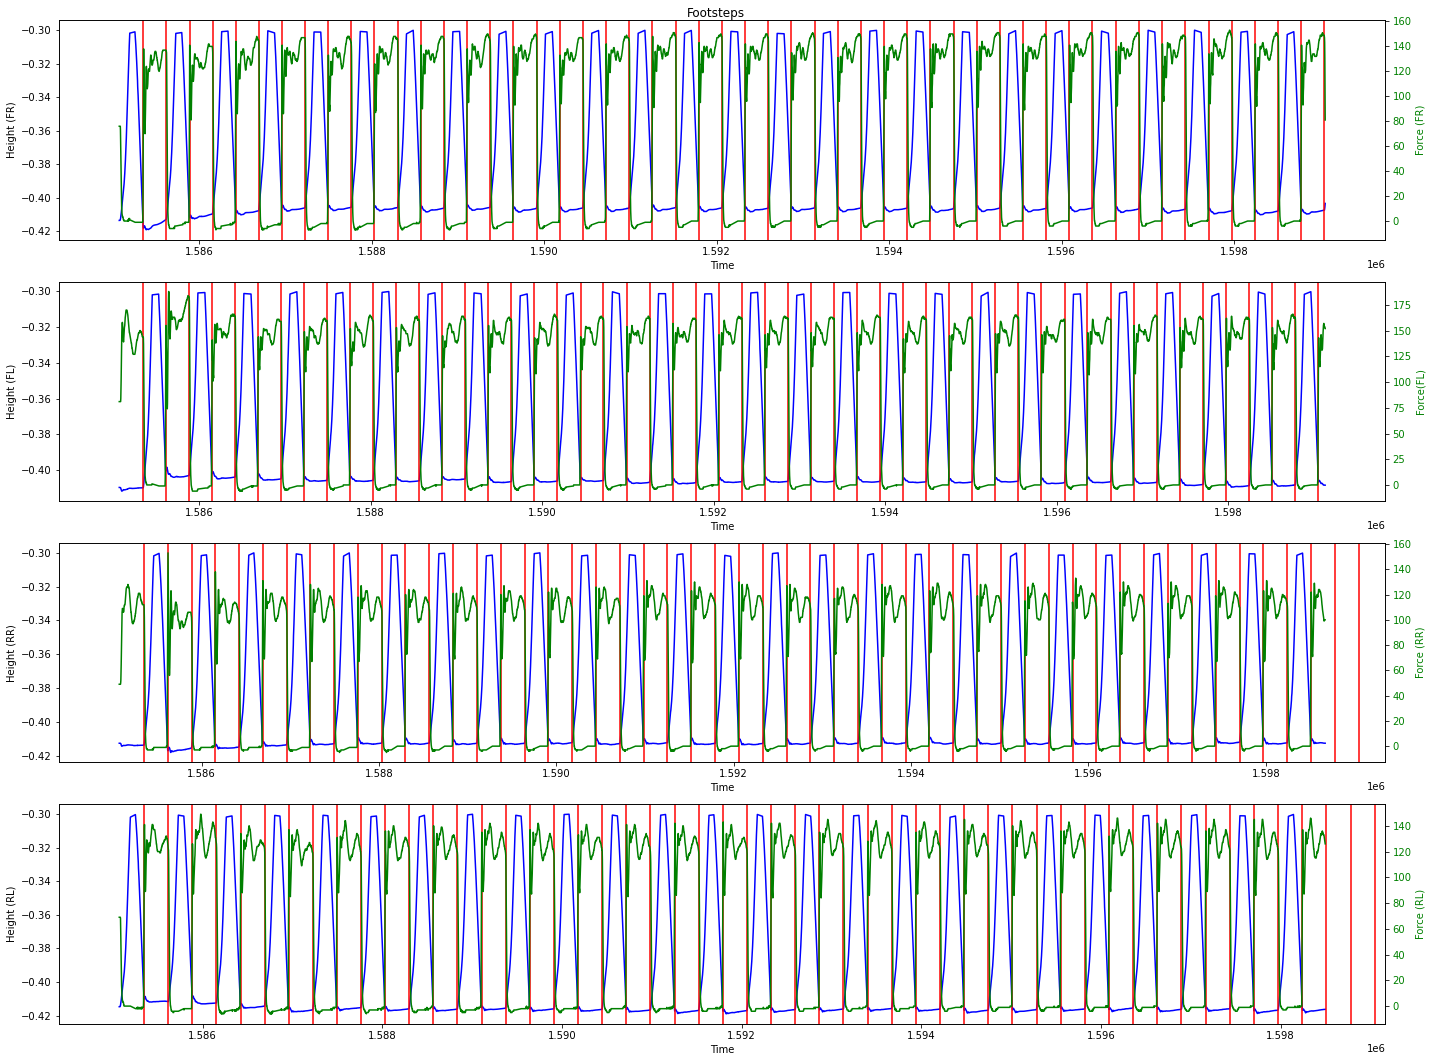

In [35]:
motion_01_fwd, footsteps_01_fwd = footstep_extraction_and_plotting(dataset=motion_01, velocities=[velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 6000))

### Backward motion

Foot swinging motions lenghts:  10536 10338 10603 10589
Min and max diff between front and rear feet 0.001896 0.265083 

Amount of footsteps found with height criteria:  4821 

Intersection with motion commands:  4821 

Intersection with no motion commands:  0 

Number of force footsteps:  327 

Number of height-force footsteps:  327 

Number of footsteps extracted with height-force due to motion:  327 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  327
Footsteps after non-maximum-suppression:  88


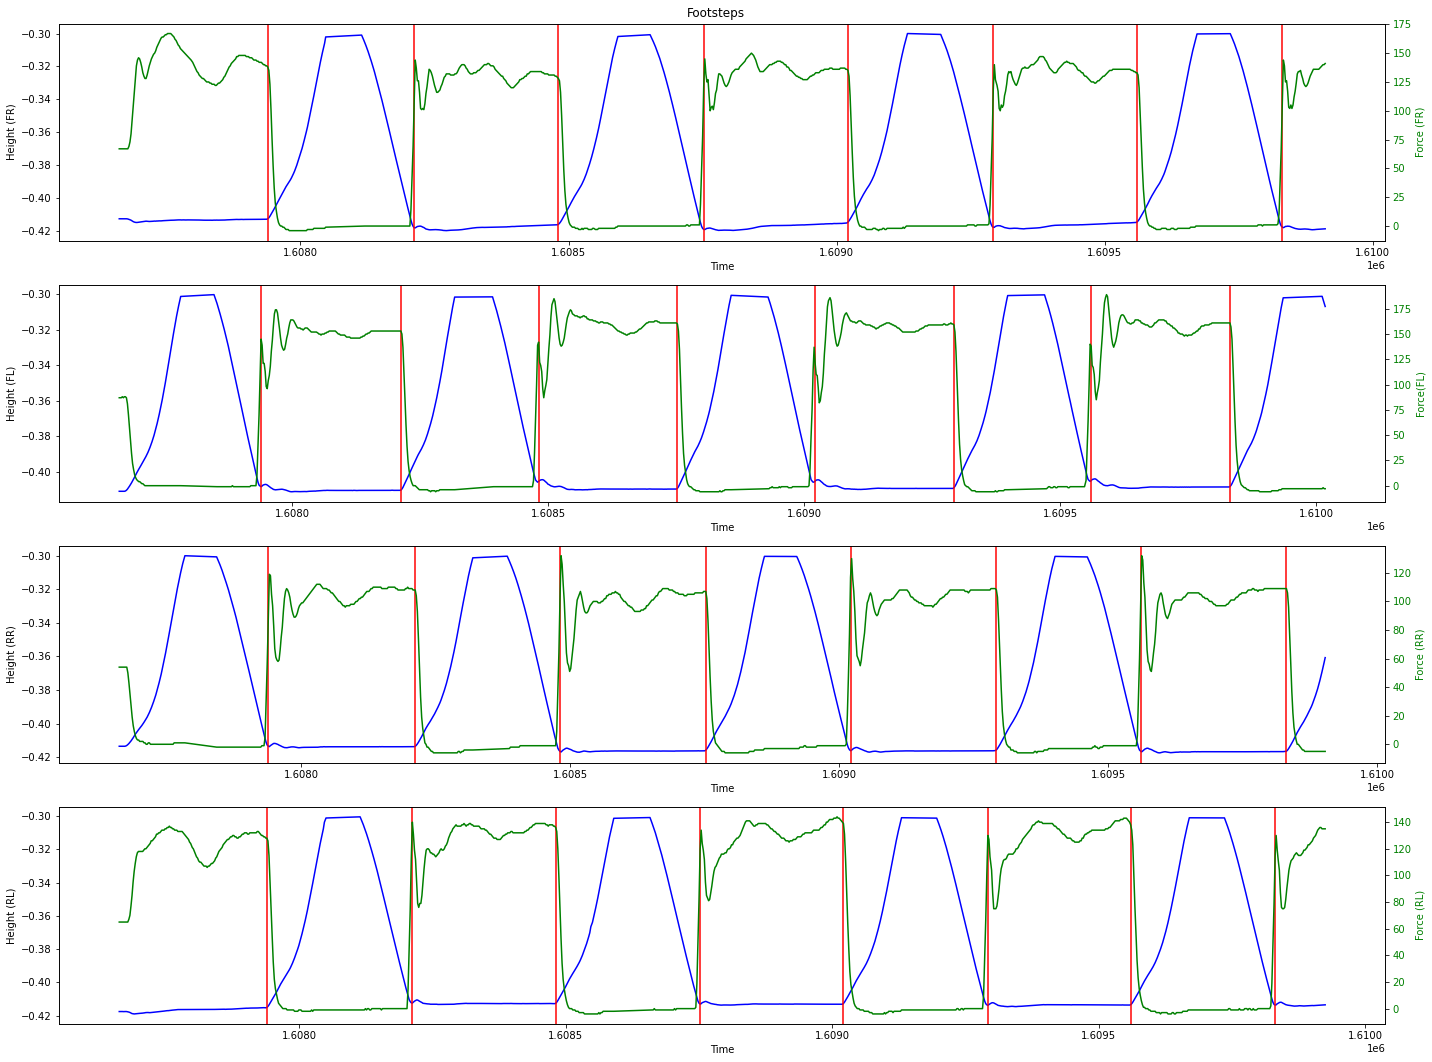

(11921, 67)


In [36]:
motion_01_bwd, footsteps_01_bwd = footstep_extraction_and_plotting(dataset=motion_01, velocities=[-velocity, 0, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 1000))
print(motion_01_bwd.shape)

### Side motion (right)

Foot swinging motions lenghts:  12117 11895 12317 12216
Min and max diff between front and rear feet 0.001382 0.264263 

Amount of footsteps found with height criteria:  5590 

Intersection with motion commands:  5590 

Intersection with no motion commands:  0 

Number of force footsteps:  374 

Number of height-force footsteps:  374 

Number of footsteps extracted with height-force due to motion:  374 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  374
Footsteps after non-maximum-suppression:  102


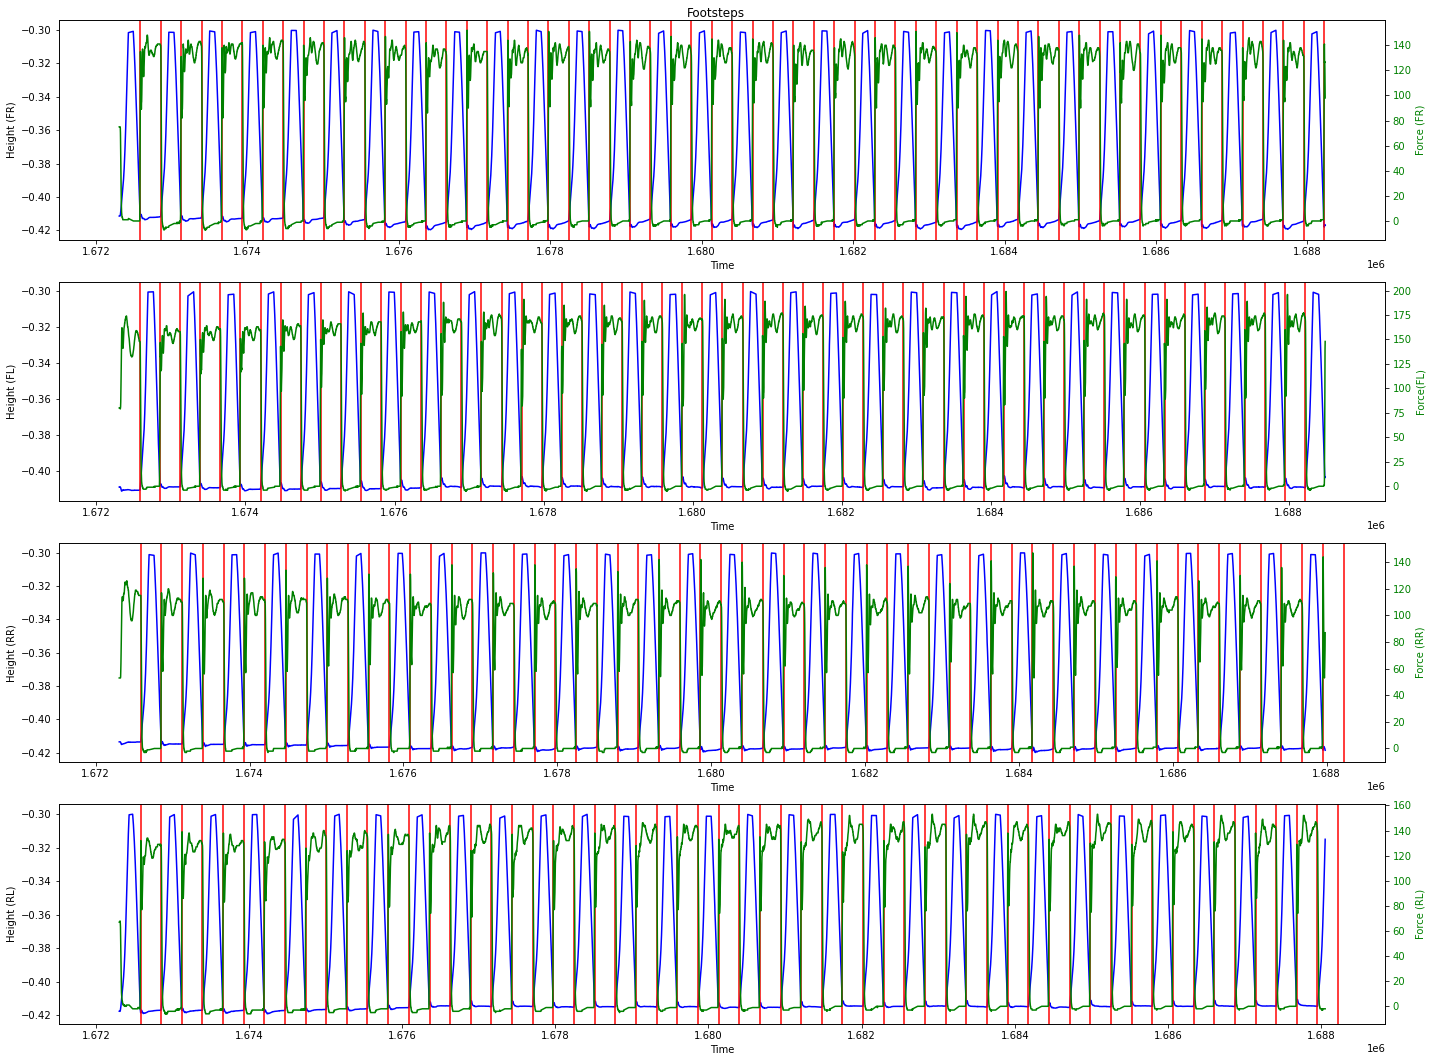

(13712, 67)


In [37]:
motion_01_side_right, footsteps_01_side_right = footstep_extraction_and_plotting(dataset=motion_01, velocities=[0, velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 7000))
print(motion_01_side_right.shape)

### Side (left)

Foot swinging motions lenghts:  10737 10788 10882 11246
Min and max diff between front and rear feet 0.000168 0.265856 

Amount of footsteps found with height criteria:  5009 

Intersection with motion commands:  5009 

Intersection with no motion commands:  0 

Number of force footsteps:  346 

Number of height-force footsteps:  346 

Number of footsteps extracted with height-force due to motion:  346 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  346
Footsteps after non-maximum-suppression:  91


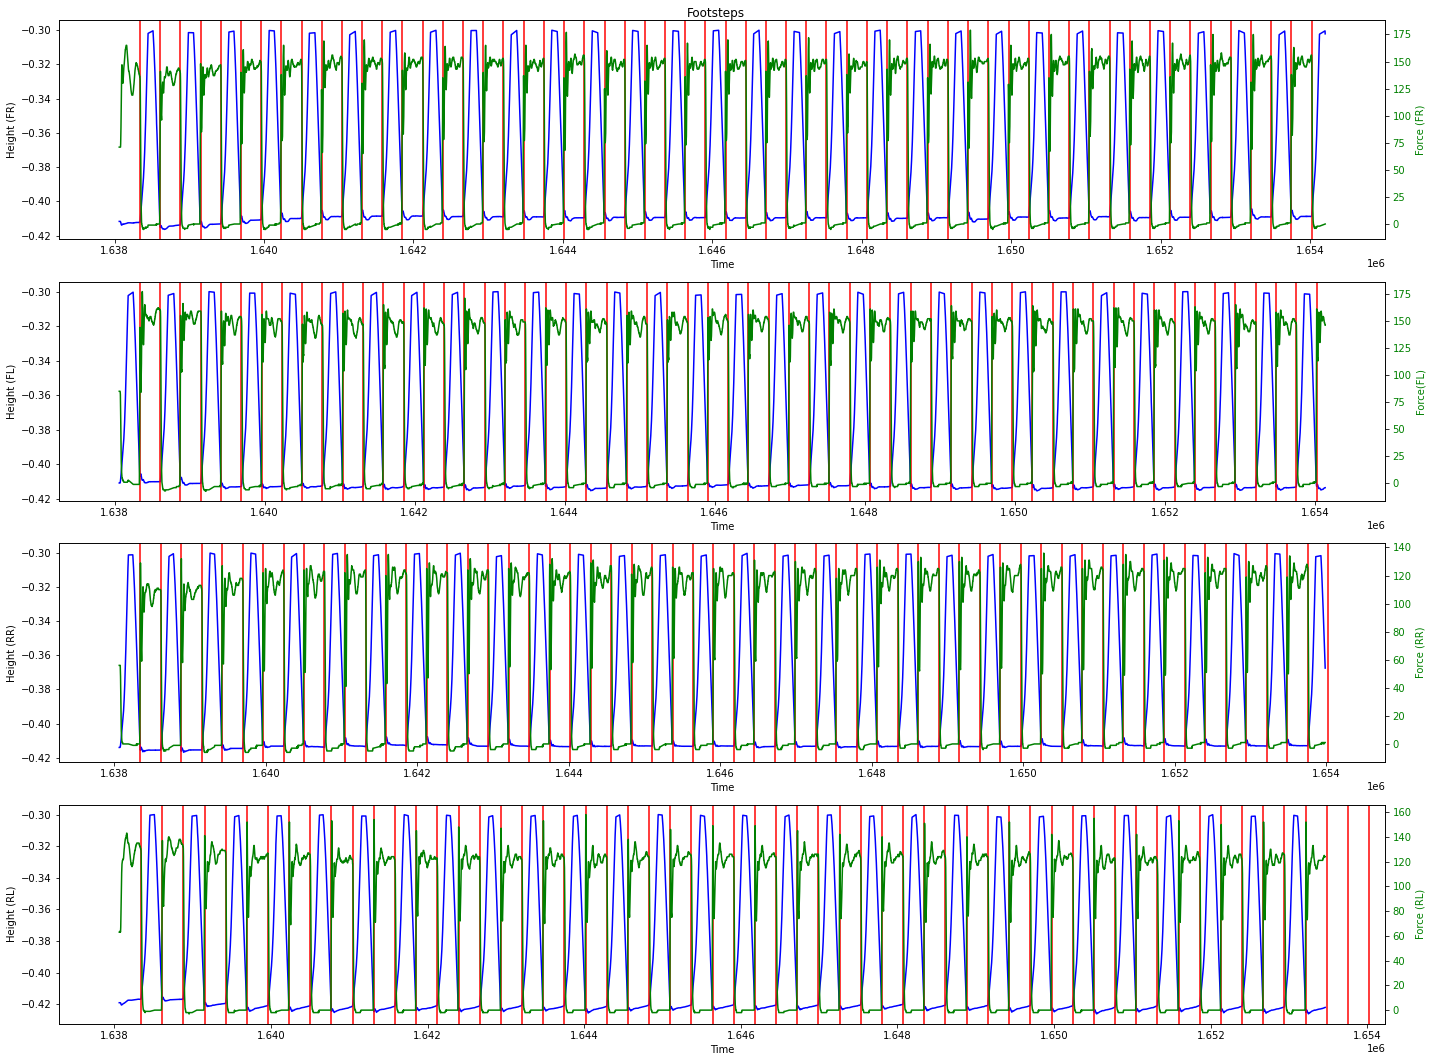

(12325, 67)


In [38]:
motion_01_side_left, footsteps_01_side_left = footstep_extraction_and_plotting(dataset=motion_01, velocities=[0, -velocity, 0], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 7000))
print(motion_01_side_left.shape)

### Rotation (clockwise)

Foot swinging motions lenghts:  7317 7280 7363 7362
Min and max diff between front and rear feet 0.00014 0.264907 

Amount of footsteps found with height criteria:  3344 

Intersection with motion commands:  3344 

Intersection with no motion commands:  0 

Number of force footsteps:  201 

Number of height-force footsteps:  201 

Number of footsteps extracted with height-force due to motion:  201 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  201
Footsteps after non-maximum-suppression:  62


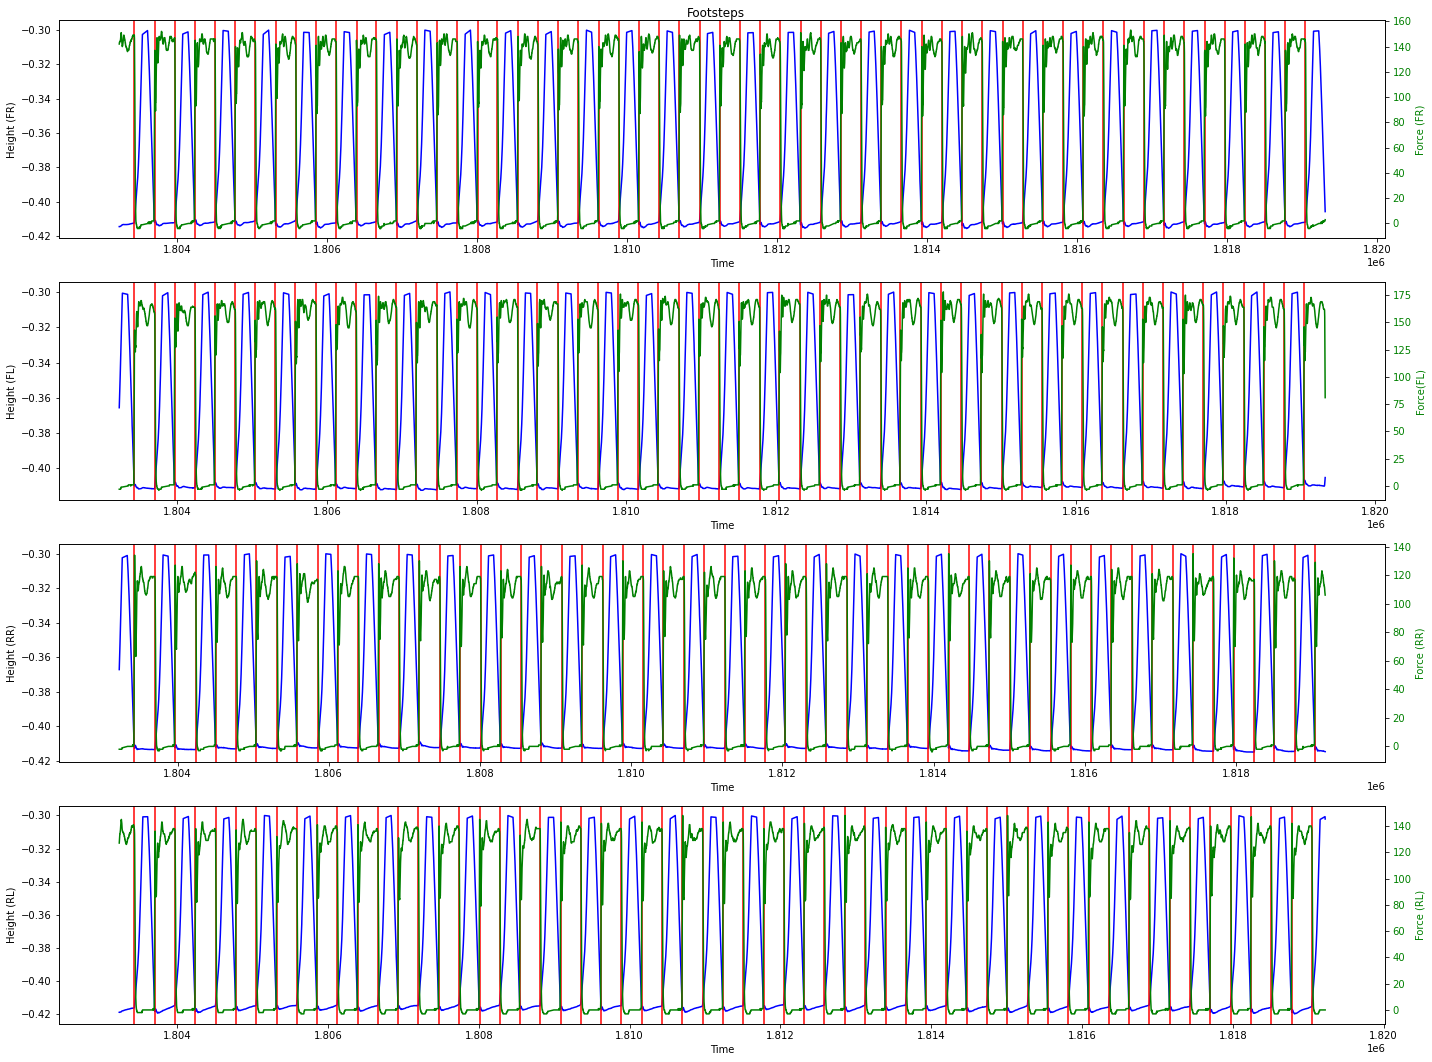

(8361, 67)


In [39]:
motion_01_clock, footsteps_01_clock = footstep_extraction_and_plotting(dataset=motion_01, velocities=[0, 0, velocity], height_threshold=0.1, force_thresholds=[90,90,90,90], indexes=range(0, 7000))
print(motion_01_clock.shape)

### Rotation (counter clockwise)

Foot swinging motions lenghts:  21528 21080 21759 22040
Min and max diff between front and rear feet 0.00127 0.267169 

Amount of footsteps found with height criteria:  9925 

Intersection with motion commands:  9925 

Intersection with no motion commands:  0 

Number of force footsteps:  684 

Number of height-force footsteps:  684 

Number of footsteps extracted with height-force due to motion:  684 

Number of footsteps extracted with height-force due to no motion:  0 

Footsteps extracted:  684
Footsteps after non-maximum-suppression:  182


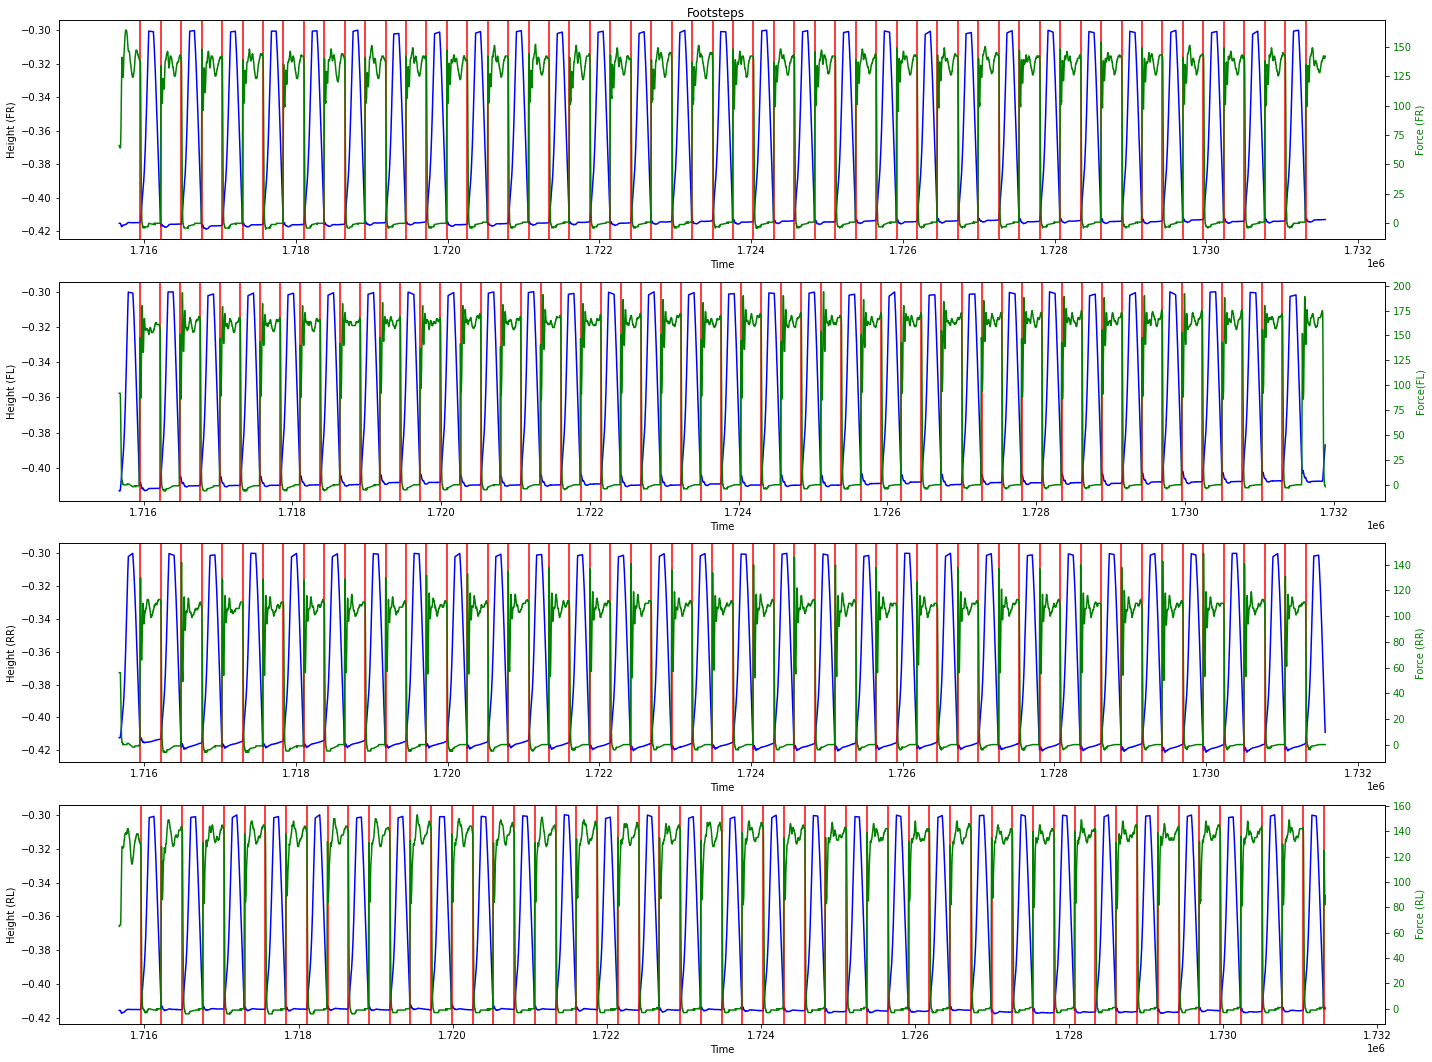

(24464, 67)


In [40]:
motion_01_count, footsteps_01_count = footstep_extraction_and_plotting(dataset=motion_01, velocities=[0, 0, -velocity], height_threshold=0.1, force_thresholds=[80,80,80,80], indexes=range(0, 7000))
print(motion_01_count.shape)

### Step size

In [42]:
def get_step_size(dataset, footsteps, idx_coord=[32,35,38,41]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footstep_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                footstep_period.append(time_diff)
                step_size_fr.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fl.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_rr_numpy = np.array(step_size_rr)
    step_size_rl_numpy = np.array(step_size_rl)
    footstep_period_numpy = np.array(footstep_period)
    
    # Only keep positive footsteps
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_fl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    
    # Print average step-size
    print("Avg. step size time: ", np.mean(footstep_period_numpy))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr_numpy))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr_numpy))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

#### Forward motion

In [43]:
# Step size and velocity along x axis 
step_size_fr_x_fwd,_,_,_ = get_step_size(motion_01_fwd, footsteps_01_fwd)

Avg. step size time:  268.5895953757225
Avg. step size for FR foot:  0.04445443023255813
Avg. step size for FL foot:  0.04445443023255813
Avg. step size for RR foot:  0.04445443023255813
Avg. step size for RL foot:  0.04445443023255813 

Std. dev. step size for FR foot:  0.005838845239728881
Std. dev. step size for FL foot:  0.005838845239728881
Std. dev. step size for RR foot:  0.005838845239728881
Std. dev. step size for RL foot:  0.005838845239728881 



In [44]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_01_fwd, footsteps_01_fwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  268.5895953757225
Avg. step size for FR foot:  0.004108223684210526
Avg. step size for FL foot:  0.004108223684210526
Avg. step size for RR foot:  0.004108223684210526
Avg. step size for RL foot:  0.004108223684210526 

Std. dev. step size for FR foot:  0.00717491183074139
Std. dev. step size for FL foot:  0.00717491183074139
Std. dev. step size for RR foot:  0.00717491183074139
Std. dev. step size for RL foot:  0.00717491183074139 



### Backward motion

In [45]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_01_bwd, footsteps_01_bwd)

Avg. step size time:  270.0689655172414
Avg. step size for FR foot:  0.010139790697674417
Avg. step size for FL foot:  0.010139790697674417
Avg. step size for RR foot:  0.010139790697674417
Avg. step size for RL foot:  0.010139790697674417 

Std. dev. step size for FR foot:  0.0009941233267309832
Std. dev. step size for FL foot:  0.0009941233267309832
Std. dev. step size for RR foot:  0.0009941233267309832
Std. dev. step size for RL foot:  0.0009941233267309832 



In [46]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_01_bwd, footsteps_01_bwd, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.0689655172414
Avg. step size for FR foot:  0.01689890909090909
Avg. step size for FL foot:  0.01689890909090909
Avg. step size for RR foot:  0.01689890909090909
Avg. step size for RL foot:  0.01689890909090909 

Std. dev. step size for FR foot:  0.002734458204755324
Std. dev. step size for FL foot:  0.002734458204755324
Std. dev. step size for RR foot:  0.002734458204755324
Std. dev. step size for RL foot:  0.002734458204755324 



### Side motion (right)

In [47]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_01_side_right, footsteps_01_side_right)

Avg. step size time:  269.58415841584156
Avg. step size for FR foot:  0.002796079999999999
Avg. step size for FL foot:  0.002796079999999999
Avg. step size for RR foot:  0.002796079999999999
Avg. step size for RL foot:  0.002796079999999999 

Std. dev. step size for FR foot:  0.0015242968325099937
Std. dev. step size for FL foot:  0.0015242968325099937
Std. dev. step size for RR foot:  0.0015242968325099937
Std. dev. step size for RL foot:  0.0015242968325099937 



In [48]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_01_side_right, footsteps_01_side_right, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.58415841584156
Avg. step size for FR foot:  0.019962333333333332
Avg. step size for FL foot:  0.019962333333333332
Avg. step size for RR foot:  0.019962333333333332
Avg. step size for RL foot:  0.019962333333333332 

Std. dev. step size for FR foot:  0.005901073646634699
Std. dev. step size for FL foot:  0.005901073646634699
Std. dev. step size for RR foot:  0.005901073646634699
Std. dev. step size for RL foot:  0.005901073646634699 



### Side motions (left)

In [49]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_01_side_left, footsteps_01_side_left)

Avg. step size time:  270.34444444444443
Avg. step size for FR foot:  0.012636111111111105
Avg. step size for FL foot:  0.012636111111111105
Avg. step size for RR foot:  0.012636111111111105
Avg. step size for RL foot:  0.012636111111111105 

Std. dev. step size for FR foot:  0.0017216982600808505
Std. dev. step size for FL foot:  0.0017216982600808505
Std. dev. step size for RR foot:  0.0017216982600808505
Std. dev. step size for RL foot:  0.0017216982600808505 



In [50]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_01_side_left, footsteps_01_side_left, idx_coord=[33, 36, 39, 42])

Avg. step size time:  270.34444444444443
Avg. step size for FR foot:  0.00927218181818182
Avg. step size for FL foot:  0.00927218181818182
Avg. step size for RR foot:  0.00927218181818182
Avg. step size for RL foot:  0.00927218181818182 

Std. dev. step size for FR foot:  0.0019878936348068986
Std. dev. step size for FL foot:  0.0019878936348068986
Std. dev. step size for RR foot:  0.0019878936348068986
Std. dev. step size for RL foot:  0.0019878936348068986 



### Rotation (clockwise)

In [51]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_01_clock, footsteps_01_clock)

Avg. step size time:  269.327868852459
Avg. step size for FR foot:  0.010387838709677421
Avg. step size for FL foot:  0.010387838709677421
Avg. step size for RR foot:  0.010387838709677421
Avg. step size for RL foot:  0.010387838709677421 

Std. dev. step size for FR foot:  0.0012778467043397187
Std. dev. step size for FL foot:  0.0012778467043397187
Std. dev. step size for RR foot:  0.0012778467043397187
Std. dev. step size for RL foot:  0.0012778467043397187 



In [52]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_01_clock, footsteps_01_clock, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.327868852459
Avg. step size for FR foot:  0.00978138709677419
Avg. step size for FL foot:  0.00978138709677419
Avg. step size for RR foot:  0.00978138709677419
Avg. step size for RL foot:  0.00978138709677419 

Std. dev. step size for FR foot:  0.0031376788593400753
Std. dev. step size for FL foot:  0.0031376788593400753
Std. dev. step size for RR foot:  0.0031376788593400753
Std. dev. step size for RL foot:  0.0031376788593400753 



### Rotation (counter clockwise)

In [53]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_01_count, footsteps_01_count)

Avg. step size time:  269.6368715083799
Avg. step size for FR foot:  0.001991755319148938
Avg. step size for FL foot:  0.001991755319148938
Avg. step size for RR foot:  0.001991755319148938
Avg. step size for RL foot:  0.001991755319148938 

Std. dev. step size for FR foot:  0.0020614904011840153
Std. dev. step size for FL foot:  0.0020614904011840153
Std. dev. step size for RR foot:  0.0020614904011840153
Std. dev. step size for RL foot:  0.0020614904011840153 



In [54]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_01_count, footsteps_01_count, idx_coord=[33, 36, 39, 42])

Avg. step size time:  269.6368715083799
Avg. step size for FR foot:  0.005235988764044943
Avg. step size for FL foot:  0.005235988764044943
Avg. step size for RR foot:  0.005235988764044943
Avg. step size for RL foot:  0.005235988764044943 

Std. dev. step size for FR foot:  0.002358745574509258
Std. dev. step size for FL foot:  0.002358745574509258
Std. dev. step size for RR foot:  0.002358745574509258
Std. dev. step size for RL foot:  0.002358745574509258 



### Footstep visualization

In [55]:
def visualize_static_foosteps(dataset, footsteps):
    old_xs = None
    old_ys = None
    old_zs = None
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
        
        time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
        #if time_diff < 300:
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

        #print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])
        if idx > 0 and idx < len(footsteps):
            print(f'Diff: {time_diff}. Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}. Step size: {[xs[0]-old_xs[0], ys[0]-old_ys[0], zs[0]-old_zs[0]]}.')
        else:
            print(f'Command: {dataset[footstep, 2:5]}. State: {dataset[footstep, 25:28]}. Coord: {[xs[0], ys[0], zs[0]]}.')
            
        old_xs = xs
        old_ys = ys
        old_zs = zs

In [56]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [57]:
def update_prediction_points(dataset, num, x, y, z, points):  
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    new_y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    new_z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
    y = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
    z = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, x, y, z, points))
    
    return anim   

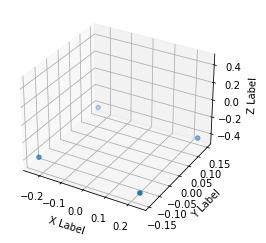

Time diff:  271.0
Footstep timestamp:  1803430.0
Height check index:  150
Height check timestamp:  1803530.0

FL moving: 0.00216700000000003. FR moving: 0.09847
RL moving: 0.09868299999999997. RR moving: 0.0009040000000000159

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.31353
RR moving: -0.409. RL moving: -0.411167

Coord FR: [0.231, -0.144, -0.412]. Coord FL: [0.241, 0.138, -0.409]. Coord RR: [-0.239, -0.131, -0.412]. Coord RL: [-0.241, 0.148, -0.416]

FR step_size x: 0.010999999999999982. FR step_size y: 0.009999999999999981. RL step_size x: 0.008000000000000007. RL step_size x: 0.01999999999999999.


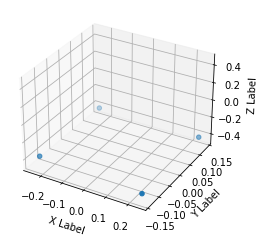

Time diff:  267.0
Footstep timestamp:  1803701.0
Height check index:  285
Height check timestamp:  1803801.0

FL moving: 0.100238. FR moving: 0.0012520000000000309
RL moving: 0.00018199999999995997. RR moving: 0.101327

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.413252
RR moving: -0.411. RL moving: -0.310762

Coord FR: [0.241, -0.139, -0.412]. Coord FL: [0.242, 0.133, -0.411]. Coord RR: [-0.247, -0.122, -0.413]. Coord RL: [-0.241, 0.137, -0.418]

FR step_size x: 0.012999999999999984. FR step_size y: 0.003999999999999976. RL step_size x: 0.009000000000000008. RL step_size x: 0.027999999999999997.


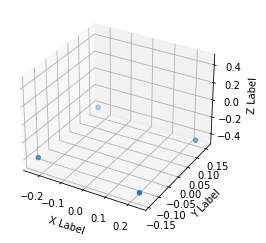

Time diff:  271.0
Footstep timestamp:  1803968.0
Height check index:  418
Height check timestamp:  1804068.0

FL moving: 0.0014300000000000423. FR moving: 0.09856399999999998
RL moving: 0.09808999999999996. RR moving: 0.0011510000000000131

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.313436
RR moving: -0.409. RL moving: -0.41043

Coord FR: [0.229, -0.142, -0.412]. Coord FL: [0.241, 0.134, -0.409]. Coord RR: [-0.239, -0.131, -0.412]. Coord RL: [-0.24, 0.156, -0.414]

FR step_size x: 0.015999999999999986. FR step_size y: 0.00899999999999998. RL step_size x: 0.008000000000000007. RL step_size x: 0.028999999999999998.


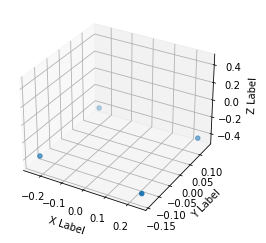

Time diff:  267.0
Footstep timestamp:  1804239.0
Height check index:  553
Height check timestamp:  1804339.0

FL moving: 0.100715. FR moving: 0.0011840000000000184
RL moving: 0.0005330000000000057. RR moving: 0.10138399999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.413184
RR moving: -0.411. RL moving: -0.310285

Coord FR: [0.242, -0.14, -0.412]. Coord FL: [0.244, 0.127, -0.411]. Coord RR: [-0.246, -0.122, -0.413]. Coord RL: [-0.241, 0.136, -0.418]

FR step_size x: 0.014999999999999986. FR step_size y: 0.009999999999999981. RL step_size x: 0.008000000000000007. RL step_size x: 0.025999999999999995.


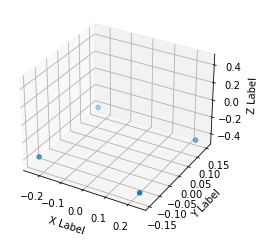

Time diff:  271.0
Footstep timestamp:  1804506.0
Height check index:  686
Height check timestamp:  1804606.0

FL moving: 0.0016349999999999976. FR moving: 0.09993999999999997
RL moving: 0.09805399999999997. RR moving: 0.0002489999999999992

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.31106
RR moving: -0.409. RL moving: -0.410635

Coord FR: [0.23, -0.146, -0.411]. Coord FL: [0.241, 0.131, -0.409]. Coord RR: [-0.239, -0.131, -0.412]. Coord RL: [-0.24, 0.153, -0.414]

FR step_size x: 0.010999999999999982. FR step_size y: 0.014999999999999986. RL step_size x: 0.009000000000000008. RL step_size x: 0.022999999999999993.


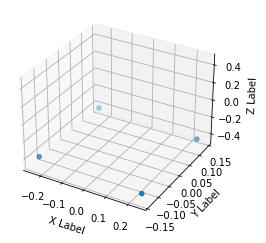

Time diff:  267.0
Footstep timestamp:  1804777.0
Height check index:  821
Height check timestamp:  1804877.0

FL moving: 0.10103999999999996. FR moving: 0.0008480000000000154
RL moving: 1.6999999999989246e-05. RR moving: 0.10155799999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.412848
RR moving: -0.411. RL moving: -0.30996

Coord FR: [0.24, -0.137, -0.412]. Coord FL: [0.242, 0.125, -0.411]. Coord RR: [-0.246, -0.122, -0.413]. Coord RL: [-0.242, 0.139, -0.417]

FR step_size x: 0.010999999999999982. FR step_size y: 0.012999999999999984. RL step_size x: 0.01100000000000001. RL step_size x: 0.021999999999999992.


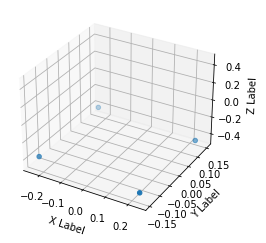

Time diff:  271.0
Footstep timestamp:  1805044.0
Height check index:  954
Height check timestamp:  1805144.0

FL moving: 0.0020920000000000383. FR moving: 0.10028199999999998
RL moving: 0.09894399999999998. RR moving: 6.500000000003725e-05

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.310718
RR moving: -0.409. RL moving: -0.411092

Coord FR: [0.23, -0.147, -0.411]. Coord FL: [0.241, 0.128, -0.409]. Coord RR: [-0.239, -0.131, -0.412]. Coord RL: [-0.238, 0.152, -0.414]

FR step_size x: 0.00799999999999998. FR step_size y: 0.02099999999999999. RL step_size x: 0.015000000000000013. RL step_size x: 0.019000000000000017.


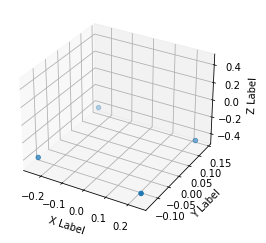

Time diff:  267.0
Footstep timestamp:  1805315.0
Height check index:  1088
Height check timestamp:  1805414.0

FL moving: 0.09991699999999998. FR moving: 0.000490000000000046
RL moving: 7.899999999999574e-05. RR moving: 0.099885

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.41349
RR moving: -0.412. RL moving: -0.312083

Coord FR: [0.237, -0.134, -0.413]. Coord FL: [0.242, 0.12, -0.412]. Coord RR: [-0.247, -0.123, -0.413]. Coord RL: [-0.245, 0.141, -0.416]

FR step_size x: 0.010999999999999982. FR step_size y: 0.027999999999999997. RL step_size x: 0.013000000000000012. RL step_size x: 0.015000000000000013.


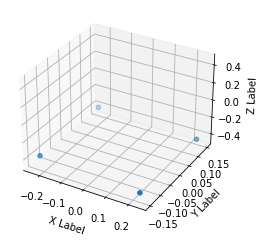

Time diff:  273.0
Footstep timestamp:  1805582.0
Height check index:  1221
Height check timestamp:  1805681.0

FL moving: 0.002634000000000025. FR moving: 0.09779299999999996
RL moving: 0.09798699999999999. RR moving: 0.0006600000000000494

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.41. FR later: -0.312207
RR moving: -0.409. RL moving: -0.411634

Coord FR: [0.229, -0.15, -0.41]. Coord FL: [0.239, 0.132, -0.409]. Coord RR: [-0.24, -0.13, -0.411]. Coord RL: [-0.239, 0.149, -0.414]

FR step_size x: 0.010999999999999982. FR step_size y: 0.022999999999999993. RL step_size x: 0.013000000000000012. RL step_size x: 0.014000000000000012.


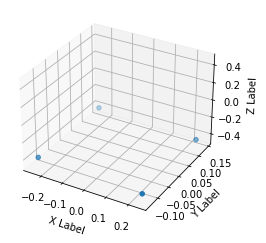

Time diff:  265.0
Footstep timestamp:  1805855.0
Height check index:  1357
Height check timestamp:  1805954.0

FL moving: 0.10006899999999996. FR moving: 0.0009070000000000467
RL moving: 0.00013099999999999223. RR moving: 0.10097599999999995

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413907
RR moving: -0.411. RL moving: -0.310931

Coord FR: [0.24, -0.134, -0.413]. Coord FL: [0.239, 0.125, -0.411]. Coord RR: [-0.248, -0.123, -0.412]. Coord RL: [-0.244, 0.142, -0.417]

FR step_size x: 0.011999999999999983. FR step_size y: 0.012999999999999984. RL step_size x: 0.01100000000000001. RL step_size x: 0.02100000000000002.


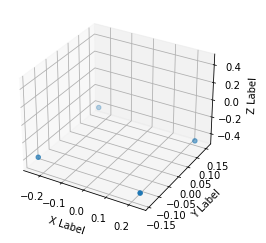

Time diff:  273.0
Footstep timestamp:  1806120.0
Height check index:  1489
Height check timestamp:  1806219.0

FL moving: 0.0018020000000000258. FR moving: 0.09722499999999995
RL moving: 0.09627799999999997. RR moving: 0.0009320000000000439

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.314775
RR moving: -0.409. RL moving: -0.410802

Coord FR: [0.229, -0.143, -0.412]. Coord FL: [0.238, 0.129, -0.409]. Coord RR: [-0.242, -0.131, -0.411]. Coord RL: [-0.239, 0.155, -0.414]

FR step_size x: 0.013999999999999985. FR step_size y: 0.009999999999999981. RL step_size x: 0.008000000000000007. RL step_size x: 0.026999999999999996.


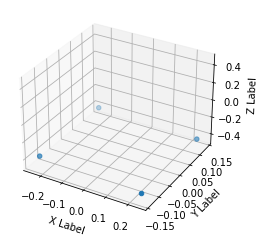

Time diff:  266.0
Footstep timestamp:  1806393.0
Height check index:  1625
Height check timestamp:  1806492.0

FL moving: 0.10067899999999996. FR moving: 0.0011470000000000091
RL moving: 2.9000000000001247e-05. RR moving: 0.10100899999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.413147
RR moving: -0.411. RL moving: -0.310321

Coord FR: [0.239, -0.139, -0.412]. Coord FL: [0.242, 0.123, -0.411]. Coord RR: [-0.246, -0.122, -0.412]. Coord RL: [-0.243, 0.137, -0.417]

FR step_size x: 0.012999999999999984. FR step_size y: 0.011999999999999983. RL step_size x: 0.009000000000000008. RL step_size x: 0.023999999999999994.


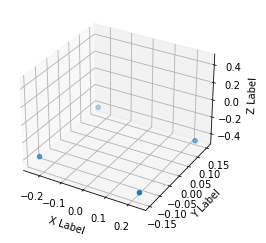

Time diff:  271.0
Footstep timestamp:  1806659.0
Height check index:  1758
Height check timestamp:  1806759.0

FL moving: 0.0015490000000000226. FR moving: 0.10012299999999996
RL moving: 0.098856. RR moving: 0.0008620000000000294

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.310877
RR moving: -0.41. RL moving: -0.411549

Coord FR: [0.228, -0.147, -0.411]. Coord FL: [0.24, 0.127, -0.41]. Coord RR: [-0.239, -0.131, -0.411]. Coord RL: [-0.241, 0.152, -0.414]

FR step_size x: 0.010999999999999982. FR step_size y: 0.01899999999999999. RL step_size x: 0.01100000000000001. RL step_size x: 0.02099999999999999.


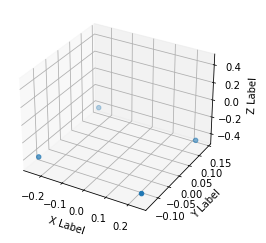

Time diff:  267.0
Footstep timestamp:  1806930.0
Height check index:  1893
Height check timestamp:  1807030.0

FL moving: 0.10135699999999997. FR moving: 0.0005290000000000017
RL moving: 4.999999999977245e-06. RR moving: 0.10069299999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413529
RR moving: -0.412. RL moving: -0.310643

Coord FR: [0.238, -0.135, -0.413]. Coord FL: [0.241, 0.12, -0.412]. Coord RR: [-0.247, -0.122, -0.412]. Coord RL: [-0.244, 0.14, -0.416]

FR step_size x: 0.010999999999999982. FR step_size y: 0.025999999999999995. RL step_size x: 0.01200000000000001. RL step_size x: 0.017999999999999988.


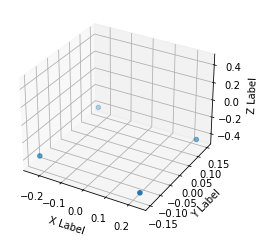

Time diff:  273.0
Footstep timestamp:  1807197.0
Height check index:  2026
Height check timestamp:  1807297.0

FL moving: 0.0018760000000000443. FR moving: 0.099244
RL moving: 0.09948999999999997. RR moving: 0.0005380000000000384

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.41. FR later: -0.310756
RR moving: -0.41. RL moving: -0.411876

Coord FR: [0.229, -0.15, -0.41]. Coord FL: [0.239, 0.131, -0.41]. Coord RR: [-0.24, -0.131, -0.411]. Coord RL: [-0.239, 0.149, -0.414]

FR step_size x: 0.011536999999999992. FR step_size y: 0.02123599999999999. RL step_size x: 0.012500000000000039. RL step_size x: 0.016935999999999993.


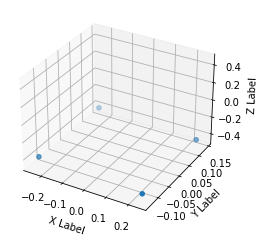

Time diff:  265.0
Footstep timestamp:  1807470.0
Height check index:  2162
Height check timestamp:  1807570.0

FL moving: 0.10277599999999998. FR moving: 0.0007070000000000132
RL moving: 0.0003090000000000037. RR moving: 0.10248399999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413707
RR moving: -0.412. RL moving: -0.309224

Coord FR: [0.24, -0.136, -0.413]. Coord FL: [0.24, 0.124, -0.412]. Coord RR: [-0.248, -0.122, -0.412]. Coord RL: [-0.244, 0.141, -0.417]

FR step_size x: 0.01361499999999996. FR step_size y: 0.011730999999999991. RL step_size x: 0.011605999999999977. RL step_size x: 0.02363700000000002.


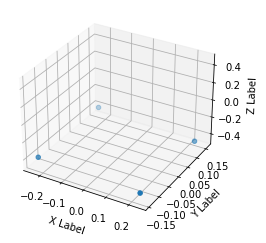

Time diff:  273.0
Footstep timestamp:  1807735.0
Height check index:  2294
Height check timestamp:  1807835.0

FL moving: 0.0018220000000000458. FR moving: 0.098634
RL moving: 0.098325. RR moving: 0.0010270000000000001

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.313366
RR moving: -0.409. RL moving: -0.410822

Coord FR: [0.229, -0.143, -0.412]. Coord FL: [0.238, 0.128, -0.409]. Coord RR: [-0.241, -0.131, -0.411]. Coord RL: [-0.239, 0.156, -0.414]

FR step_size x: 0.01478400000000002. FR step_size y: 0.008899999999999991. RL step_size x: 0.009711000000000025. RL step_size x: 0.029023000000000007.


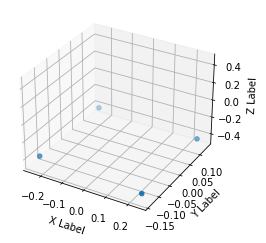

Time diff:  265.0
Footstep timestamp:  1808008.0
Height check index:  2430
Height check timestamp:  1808108.0

FL moving: 0.10223399999999999. FR moving: 0.0012510000000000021
RL moving: 0.00022199999999999998. RR moving: 0.10263799999999995

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.413251
RR moving: -0.411. RL moving: -0.308766

Coord FR: [0.24, -0.139, -0.412]. Coord FL: [0.242, 0.123, -0.411]. Coord RR: [-0.247, -0.122, -0.412]. Coord RL: [-0.243, 0.136, -0.417]

FR step_size x: 0.013857999999999981. FR step_size y: 0.010598999999999997. RL step_size x: 0.009519. RL step_size x: 0.02419099999999999.


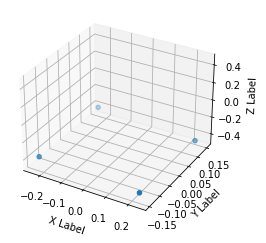

Time diff:  273.0
Footstep timestamp:  1808273.0
Height check index:  2562
Height check timestamp:  1808373.0

FL moving: 0.0022070000000000145. FR moving: 0.09924499999999997
RL moving: 0.09750799999999998. RR moving: 0.0010880000000000334

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.312755
RR moving: -0.409. RL moving: -0.411207

Coord FR: [0.228, -0.146, -0.412]. Coord FL: [0.24, 0.126, -0.409]. Coord RR: [-0.24, -0.131, -0.411]. Coord RL: [-0.241, 0.151, -0.414]

FR step_size x: 0.011397000000000018. FR step_size y: 0.017148999999999984. RL step_size x: 0.009991000000000028. RL step_size x: 0.018567999999999987.


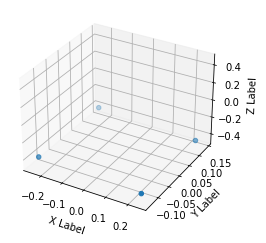

Time diff:  265.0
Footstep timestamp:  1808546.0
Height check index:  2698
Height check timestamp:  1808646.0

FL moving: 0.10285. FR moving: 0.0005609999999999782
RL moving: 0.00034200000000000896. RR moving: 0.10177699999999995

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.414. FR later: -0.413439
RR moving: -0.412. RL moving: -0.30915

Coord FR: [0.238, -0.136, -0.414]. Coord FL: [0.242, 0.119, -0.412]. Coord RR: [-0.247, -0.123, -0.412]. Coord RL: [-0.244, 0.14, -0.416]

FR step_size x: 0.01252399999999998. FR step_size y: 0.025025999999999993. RL step_size x: 0.011895000000000017. RL step_size x: 0.017087999999999992.


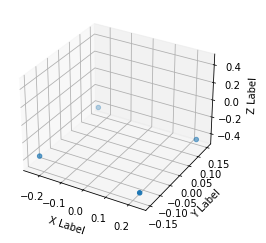

Time diff:  273.0
Footstep timestamp:  1808811.0
Height check index:  2829
Height check timestamp:  1808910.0

FL moving: 0.001395000000000035. FR moving: 0.09719799999999995
RL moving: 0.09695499999999996. RR moving: 0.0007670000000000177

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.313802
RR moving: -0.41. RL moving: -0.411395

Coord FR: [0.228, -0.149, -0.411]. Coord FL: [0.239, 0.131, -0.41]. Coord RR: [-0.24, -0.131, -0.411]. Coord RL: [-0.239, 0.149, -0.415]

FR step_size x: 0.012542999999999999. FR step_size y: 0.020631999999999998. RL step_size x: 0.012548000000000031. RL step_size x: 0.017548999999999995.


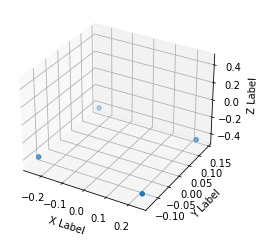

Time diff:  267.0
Footstep timestamp:  1809084.0
Height check index:  2965
Height check timestamp:  1809183.0

FL moving: 0.09893199999999996. FR moving: 0.0009390000000000231
RL moving: 6.699999999998374e-05. RR moving: 0.09913699999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413939
RR moving: -0.411. RL moving: -0.312068

Coord FR: [0.24, -0.135, -0.413]. Coord FL: [0.24, 0.124, -0.411]. Coord RR: [-0.248, -0.122, -0.412]. Coord RL: [-0.243, 0.141, -0.417]

FR step_size x: 0.01195199999999999. FR step_size y: 0.012231999999999993. RL step_size x: 0.010976999999999987. RL step_size x: 0.02409100000000003.


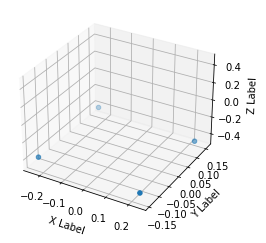

Time diff:  271.0
Footstep timestamp:  1809351.0
Height check index:  3098
Height check timestamp:  1809450.0

FL moving: 0.0018630000000000035. FR moving: 0.09842599999999996
RL moving: 0.09813. RR moving: 0.0003250000000000197

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.313574
RR moving: -0.409. RL moving: -0.410863

Coord FR: [0.229, -0.144, -0.412]. Coord FL: [0.239, 0.128, -0.409]. Coord RR: [-0.241, -0.131, -0.412]. Coord RL: [-0.239, 0.156, -0.414]

FR step_size x: 0.01281400000000002. FR step_size y: 0.011876999999999999. RL step_size x: 0.010617000000000015. RL step_size x: 0.029440000000000008.


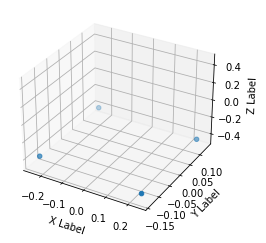

Time diff:  267.0
Footstep timestamp:  1809622.0
Height check index:  3233
Height check timestamp:  1809721.0

FL moving: 0.09925499999999998. FR moving: 0.0005940000000000389
RL moving: 0.0003889999999999727. RR moving: 0.100028

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413594
RR moving: -0.411. RL moving: -0.311745

Coord FR: [0.239, -0.139, -0.413]. Coord FL: [0.242, 0.121, -0.411]. Coord RR: [-0.247, -0.122, -0.413]. Coord RL: [-0.244, 0.136, -0.417]

FR step_size x: 0.012000999999999984. FR step_size y: 0.015961000000000003. RL step_size x: 0.010606999999999978. RL step_size x: 0.022469000000000017.


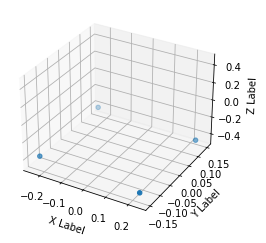

Time diff:  272.0
Footstep timestamp:  1809889.0
Height check index:  3366
Height check timestamp:  1809988.0

FL moving: 0.002407000000000048. FR moving: 0.09868699999999997
RL moving: 0.09760599999999997. RR moving: 0.0010280000000000289

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.312313
RR moving: -0.409. RL moving: -0.411407

Coord FR: [0.229, -0.149, -0.411]. Coord FL: [0.24, 0.127, -0.409]. Coord RR: [-0.24, -0.131, -0.411]. Coord RL: [-0.241, 0.149, -0.414]

FR step_size x: 0.010058999999999985. FR step_size y: 0.020621999999999988. RL step_size x: 0.010360000000000008. RL step_size x: 0.017407000000000006.


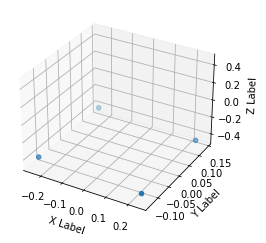

Time diff:  267.0
Footstep timestamp:  1810161.0
Height check index:  3502
Height check timestamp:  1810261.0

FL moving: 0.10140899999999997. FR moving: 0.0008600000000000274
RL moving: 1.7000000000044757e-05. RR moving: 0.10151899999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.41386
RR moving: -0.412. RL moving: -0.310591

Coord FR: [0.238, -0.135, -0.413]. Coord FL: [0.241, 0.12, -0.412]. Coord RR: [-0.247, -0.122, -0.413]. Coord RL: [-0.244, 0.14, -0.417]

FR step_size x: 0.010990999999999973. FR step_size y: 0.021708000000000005. RL step_size x: 0.011899999999999994. RL step_size x: 0.020541999999999977.


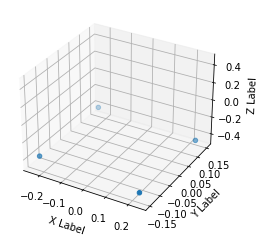

Time diff:  271.0
Footstep timestamp:  1810428.0
Height check index:  3635
Height check timestamp:  1810528.0

FL moving: 0.0009270000000000111. FR moving: 0.09979699999999997
RL moving: 0.09830699999999998. RR moving: 0.001040000000000041

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.311203
RR moving: -0.41. RL moving: -0.410927

Coord FR: [0.228, -0.148, -0.411]. Coord FL: [0.24, 0.129, -0.41]. Coord RR: [-0.24, -0.13, -0.411]. Coord RL: [-0.239, 0.152, -0.414]

FR step_size x: 0.012775999999999982. FR step_size y: 0.017348000000000002. RL step_size x: 0.01153700000000002. RL step_size x: 0.02249899999999999.


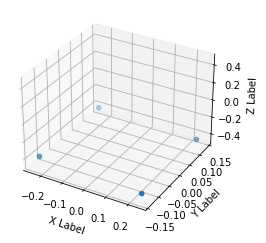

Time diff:  269.0
Footstep timestamp:  1810699.0
Height check index:  3770
Height check timestamp:  1810799.0

FL moving: 0.09901499999999996. FR moving: 0.0018560000000000243
RL moving: 0.0004930000000000212. RR moving: 0.100138

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.413856
RR moving: -0.411. RL moving: -0.311985

Coord FR: [0.239, -0.138, -0.412]. Coord FL: [0.241, 0.122, -0.411]. Coord RR: [-0.247, -0.122, -0.413]. Coord RL: [-0.244, 0.138, -0.417]

FR step_size x: 0.010766999999999999. FR step_size y: 0.014219999999999983. RL step_size x: 0.011946999999999985. RL step_size x: 0.02521699999999999.


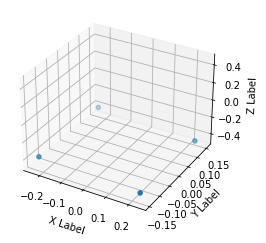

Time diff:  271.0
Footstep timestamp:  1810968.0
Height check index:  3904
Height check timestamp:  1811068.0

FL moving: 0.0008130000000000082. FR moving: 0.10088399999999997
RL moving: 0.099611. RR moving: 0.00015500000000001624

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.310116
RR moving: -0.41. RL moving: -0.410813

Coord FR: [0.23, -0.146, -0.411]. Coord FL: [0.239, 0.128, -0.41]. Coord RR: [-0.24, -0.131, -0.412]. Coord RL: [-0.239, 0.154, -0.414]

FR step_size x: 0.012072. FR step_size y: 0.013925999999999994. RL step_size x: 0.01064100000000004. RL step_size x: 0.025754.


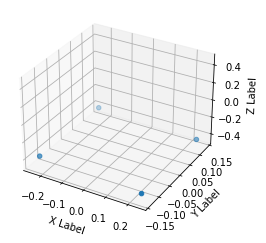

Time diff:  267.0
Footstep timestamp:  1811239.0
Height check index:  4039
Height check timestamp:  1811339.0

FL moving: 0.10222499999999995. FR moving: 0.0003670000000000062
RL moving: 9.599999999998499e-05. RR moving: 0.10220699999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413367
RR moving: -0.411. RL moving: -0.308775

Coord FR: [0.239, -0.139, -0.413]. Coord FL: [0.242, 0.121, -0.411]. Coord RR: [-0.246, -0.122, -0.412]. Coord RL: [-0.243, 0.137, -0.417]

FR step_size x: 0.01120299999999999. FR step_size y: 0.016084999999999988. RL step_size x: 0.010102. RL step_size x: 0.023888999999999994.


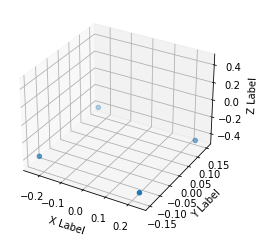

Time diff:  271.0
Footstep timestamp:  1811506.0
Height check index:  4172
Height check timestamp:  1811606.0

FL moving: 0.0020380000000000398. FR moving: 0.10125299999999998
RL moving: 0.10028499999999996. RR moving: 0.0009730000000000016

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.309747
RR moving: -0.409. RL moving: -0.411038

Coord FR: [0.229, -0.148, -0.411]. Coord FL: [0.241, 0.128, -0.409]. Coord RR: [-0.24, -0.131, -0.411]. Coord RL: [-0.239, 0.152, -0.414]

FR step_size x: 0.009796. FR step_size y: 0.01833999999999998. RL step_size x: 0.011945000000000039. RL step_size x: 0.02140199999999999.


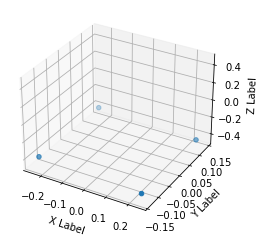

Time diff:  265.0
Footstep timestamp:  1811777.0
Height check index:  4307
Height check timestamp:  1811877.0

FL moving: 0.10217199999999999. FR moving: 0.0003870000000000262
RL moving: 0.00016900000000003024. RR moving: 0.10203799999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413387
RR moving: -0.411. RL moving: -0.308828

Coord FR: [0.238, -0.137, -0.413]. Coord FL: [0.241, 0.121, -0.411]. Coord RR: [-0.247, -0.123, -0.412]. Coord RL: [-0.244, 0.139, -0.416]

FR step_size x: 0.011464999999999975. FR step_size y: 0.018467999999999984. RL step_size x: 0.010480000000000017. RL step_size x: 0.019124000000000002.


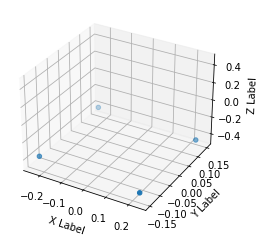

Time diff:  273.0
Footstep timestamp:  1812042.0
Height check index:  4439
Height check timestamp:  1812142.0

FL moving: 0.0020930000000000115. FR moving: 0.09841099999999997
RL moving: 0.09790199999999999. RR moving: 0.0009490000000000332

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.312589
RR moving: -0.409. RL moving: -0.411093

Coord FR: [0.228, -0.148, -0.411]. Coord FL: [0.239, 0.129, -0.409]. Coord RR: [-0.241, -0.131, -0.411]. Coord RL: [-0.24, 0.15, -0.414]

FR step_size x: 0.010288999999999993. FR step_size y: 0.019779999999999992. RL step_size x: 0.011803000000000008. RL step_size x: 0.01784999999999999.


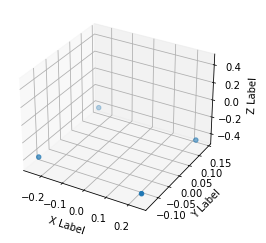

Time diff:  267.0
Footstep timestamp:  1812315.0
Height check index:  4574
Height check timestamp:  1812414.0

FL moving: 0.099269. FR moving: 8.20000000000265e-05
RL moving: 0.0005890000000000062. RR moving: 0.099806

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.414. FR later: -0.414082
RR moving: -0.411. RL moving: -0.311731

Coord FR: [0.237, -0.136, -0.414]. Coord FL: [0.24, 0.121, -0.411]. Coord RR: [-0.248, -0.123, -0.413]. Coord RL: [-0.245, 0.14, -0.416]

FR step_size x: 0.010181999999999969. FR step_size y: 0.01937. RL step_size x: 0.01224900000000001. RL step_size x: 0.020264000000000004.


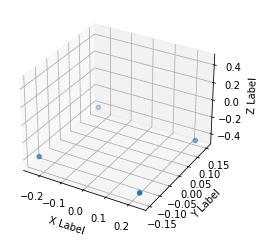

Time diff:  271.0
Footstep timestamp:  1812582.0
Height check index:  4707
Height check timestamp:  1812681.0

FL moving: 0.0017420000000000213. FR moving: 0.09909499999999999
RL moving: 0.09721399999999997. RR moving: 4.6000000000046004e-05

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.312905
RR moving: -0.409. RL moving: -0.410742

Coord FR: [0.228, -0.147, -0.412]. Coord FL: [0.239, 0.129, -0.409]. Coord RR: [-0.241, -0.131, -0.412]. Coord RL: [-0.24, 0.153, -0.414]

FR step_size x: 0.012864999999999988. FR step_size y: 0.01551799999999999. RL step_size x: 0.010645000000000016. RL step_size x: 0.02512100000000002.


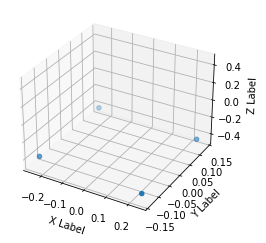

Time diff:  269.0
Footstep timestamp:  1812853.0
Height check index:  4842
Height check timestamp:  1812952.0

FL moving: 0.09742499999999998. FR moving: 0.0019580000000000153
RL moving: 0.0003750000000000142. RR moving: 0.09875299999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.413958
RR moving: -0.411. RL moving: -0.313575

Coord FR: [0.239, -0.138, -0.412]. Coord FL: [0.241, 0.122, -0.411]. Coord RR: [-0.248, -0.122, -0.413]. Coord RL: [-0.244, 0.137, -0.417]

FR step_size x: 0.009999999999999981. FR step_size y: 0.012749999999999984. RL step_size x: 0.013178999999999996. RL step_size x: 0.027448.


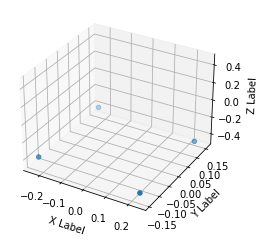

Time diff:  271.0
Footstep timestamp:  1813122.0
Height check index:  4976
Height check timestamp:  1813221.0

FL moving: 0.0017530000000000046. FR moving: 0.10003399999999996
RL moving: 0.09756399999999998. RR moving: 0.00041000000000002146

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.311966
RR moving: -0.409. RL moving: -0.410753

Coord FR: [0.23, -0.145, -0.412]. Coord FL: [0.24, 0.127, -0.409]. Coord RR: [-0.24, -0.131, -0.412]. Coord RL: [-0.238, 0.156, -0.413]

FR step_size x: 0.011519000000000001. FR step_size y: 0.013501999999999986. RL step_size x: 0.012106000000000033. RL step_size x: 0.02637000000000002.


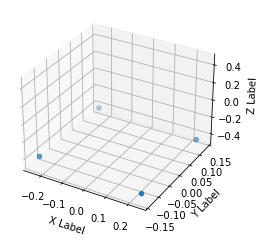

Time diff:  266.0
Footstep timestamp:  1813393.0
Height check index:  5111
Height check timestamp:  1813492.0

FL moving: 0.10100099999999995. FR moving: 0.00023900000000004473
RL moving: 0.00044800000000000395. RR moving: 0.10164199999999995

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413239
RR moving: -0.411. RL moving: -0.309999

Coord FR: [0.239, -0.138, -0.413]. Coord FL: [0.242, 0.121, -0.411]. Coord RR: [-0.247, -0.122, -0.413]. Coord RL: [-0.243, 0.138, -0.417]

FR step_size x: 0.012348999999999971. FR step_size y: 0.017893999999999993. RL step_size x: 0.010145999999999988. RL step_size x: 0.022179999999999978.


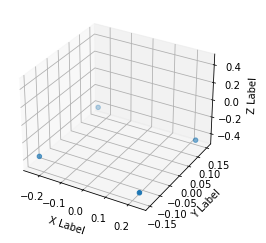

Time diff:  271.0
Footstep timestamp:  1813659.0
Height check index:  5244
Height check timestamp:  1813759.0

FL moving: 0.0018540000000000223. FR moving: 0.100045
RL moving: 0.09904999999999997. RR moving: 5.899999999997574e-05

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.310955
RR moving: -0.409. RL moving: -0.410854

Coord FR: [0.228, -0.148, -0.411]. Coord FL: [0.24, 0.129, -0.409]. Coord RR: [-0.24, -0.131, -0.412]. Coord RL: [-0.24, 0.151, -0.414]

FR step_size x: 0.01056399999999999. FR step_size y: 0.018799999999999997. RL step_size x: 0.011809000000000042. RL step_size x: 0.020458000000000004.


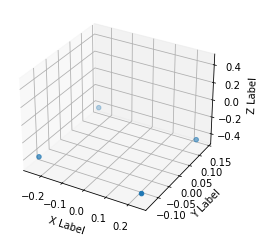

Time diff:  269.0
Footstep timestamp:  1813930.0
Height check index:  5379
Height check timestamp:  1814030.0

FL moving: 0.09919799999999995. FR moving: 0.0007850000000000357
RL moving: 0.0011460000000000359. RR moving: 0.10012199999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413785
RR moving: -0.411. RL moving: -0.311802

Coord FR: [0.238, -0.136, -0.413]. Coord FL: [0.241, 0.122, -0.411]. Coord RR: [-0.247, -0.122, -0.413]. Coord RL: [-0.244, 0.139, -0.416]

FR step_size x: 0.009938000000000002. FR step_size y: 0.016651. RL step_size x: 0.011447999999999986. RL step_size x: 0.022586999999999996.


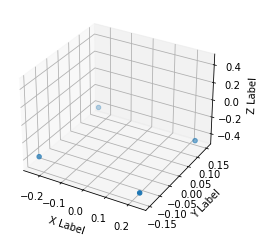

Time diff:  271.0
Footstep timestamp:  1814199.0
Height check index:  5513
Height check timestamp:  1814299.0

FL moving: 0.0024240000000000372. FR moving: 0.100443
RL moving: 0.09870199999999996. RR moving: 0.0005539999999999989

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.311557
RR moving: -0.409. RL moving: -0.411424

Coord FR: [0.229, -0.147, -0.412]. Coord FL: [0.24, 0.128, -0.409]. Coord RR: [-0.241, -0.131, -0.413]. Coord RL: [-0.239, 0.153, -0.414]

FR step_size x: 0.01050799999999999. FR step_size y: 0.01875599999999998. RL step_size x: 0.01205500000000001. RL step_size x: 0.022084000000000006.


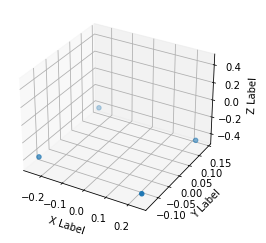

Time diff:  267.0
Footstep timestamp:  1814470.0
Height check index:  5648
Height check timestamp:  1814570.0

FL moving: 0.10129899999999997. FR moving: 0.000124000000000013
RL moving: 0.00022100000000002673. RR moving: 0.101163

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.414. FR later: -0.414124
RR moving: -0.412. RL moving: -0.310701

Coord FR: [0.239, -0.136, -0.414]. Coord FL: [0.241, 0.12, -0.412]. Coord RR: [-0.248, -0.122, -0.414]. Coord RL: [-0.244, 0.14, -0.417]

FR step_size x: 0.011482999999999965. FR step_size y: 0.02130399999999999. RL step_size x: 0.01306099999999999. RL step_size x: 0.020893999999999996.


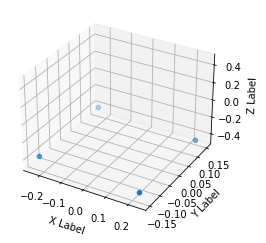

Time diff:  273.0
Footstep timestamp:  1814737.0
Height check index:  5781
Height check timestamp:  1814837.0

FL moving: 0.0018910000000000315. FR moving: 0.09991499999999998
RL moving: 0.099024. RR moving: 0.0012090000000000156

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.311085
RR moving: -0.409. RL moving: -0.410891

Coord FR: [0.228, -0.148, -0.411]. Coord FL: [0.24, 0.129, -0.409]. Coord RR: [-0.24, -0.131, -0.412]. Coord RL: [-0.239, 0.152, -0.415]

FR step_size x: 0.013482999999999995. FR step_size y: 0.017769999999999994. RL step_size x: 0.011745000000000033. RL step_size x: 0.021658999999999998.


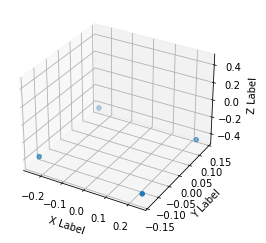

Time diff:  267.0
Footstep timestamp:  1815010.0
Height check index:  5917
Height check timestamp:  1815110.0

FL moving: 0.10208699999999998. FR moving: 0.0007790000000000297
RL moving: 0.00036199999999997345. RR moving: 0.10242599999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413779
RR moving: -0.411. RL moving: -0.308913

Coord FR: [0.241, -0.137, -0.413]. Coord FL: [0.241, 0.122, -0.411]. Coord RR: [-0.247, -0.122, -0.413]. Coord RL: [-0.243, 0.139, -0.418]

FR step_size x: 0.01161899999999999. FR step_size y: 0.015943999999999986. RL step_size x: 0.011356000000000005. RL step_size x: 0.025846000000000008.


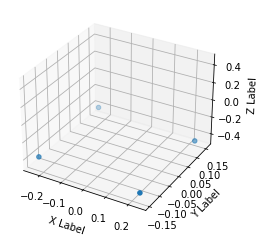

Time diff:  271.0
Footstep timestamp:  1815277.0
Height check index:  6050
Height check timestamp:  1815377.0

FL moving: 0.002259000000000011. FR moving: 0.10066599999999998
RL moving: 0.09961599999999998. RR moving: 0.00037800000000004497

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.310334
RR moving: -0.408. RL moving: -0.410259

Coord FR: [0.23, -0.146, -0.411]. Coord FL: [0.24, 0.129, -0.408]. Coord RR: [-0.24, -0.131, -0.413]. Coord RL: [-0.238, 0.156, -0.414]

FR step_size x: 0.011532000000000014. FR step_size y: 0.01620299999999998. RL step_size x: 0.012123000000000023. RL step_size x: 0.025401000000000007.


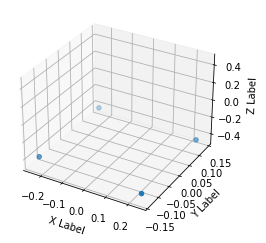

Time diff:  267.0
Footstep timestamp:  1815548.0
Height check index:  6185
Height check timestamp:  1815648.0

FL moving: 0.10130899999999998. FR moving: 0.0005210000000000492
RL moving: 0.0008259999999999934. RR moving: 0.10157699999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413521
RR moving: -0.411. RL moving: -0.309691

Coord FR: [0.239, -0.137, -0.413]. Coord FL: [0.242, 0.122, -0.411]. Coord RR: [-0.247, -0.122, -0.414]. Coord RL: [-0.243, 0.14, -0.417]

FR step_size x: 0.01213599999999998. FR step_size y: 0.016204999999999997. RL step_size x: 0.010518. RL step_size x: 0.02290299999999998.


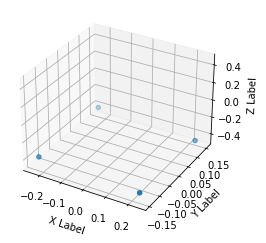

Time diff:  273.0
Footstep timestamp:  1815815.0
Height check index:  6317
Height check timestamp:  1815914.0

FL moving: 0.0021270000000000455. FR moving: 0.098107
RL moving: 0.09738999999999998. RR moving: 0.0005870000000000042

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.312893
RR moving: -0.408. RL moving: -0.410127

Coord FR: [0.229, -0.146, -0.411]. Coord FL: [0.24, 0.129, -0.408]. Coord RR: [-0.24, -0.131, -0.413]. Coord RL: [-0.239, 0.154, -0.415]

FR step_size x: 0.012703999999999993. FR step_size y: 0.016992000000000007. RL step_size x: 0.011959000000000025. RL step_size x: 0.02246200000000001.


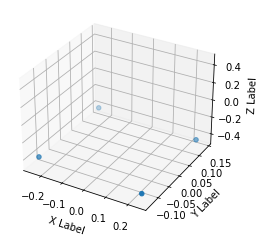

Time diff:  265.0
Footstep timestamp:  1816088.0
Height check index:  6453
Height check timestamp:  1816187.0

FL moving: 0.100439. FR moving: 0.0006059999999999954
RL moving: 0.00044399999999999995. RR moving: 0.10123299999999996

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413606
RR moving: -0.41. RL moving: -0.309561

Coord FR: [0.24, -0.136, -0.413]. Coord FL: [0.242, 0.122, -0.41]. Coord RR: [-0.247, -0.122, -0.414]. Coord RL: [-0.244, 0.14, -0.418]

FR step_size x: 0.014063999999999993. FR step_size y: 0.019436999999999982. RL step_size x: 0.01153599999999999. RL step_size x: 0.020134999999999986.


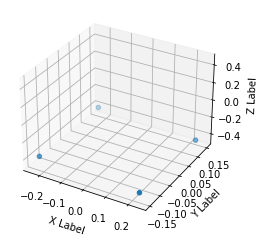

Time diff:  273.0
Footstep timestamp:  1816353.0
Height check index:  6585
Height check timestamp:  1816452.0

FL moving: 0.001485000000000014. FR moving: 0.09682299999999999
RL moving: 0.09573199999999998. RR moving: 0.0010030000000000316

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.314177
RR moving: -0.409. RL moving: -0.410485

Coord FR: [0.228, -0.148, -0.411]. Coord FL: [0.24, 0.129, -0.409]. Coord RR: [-0.24, -0.131, -0.412]. Coord RL: [-0.239, 0.151, -0.415]

FR step_size x: 0.011646000000000017. FR step_size y: 0.016978999999999994. RL step_size x: 0.01256400000000002. RL step_size x: 0.020734000000000016.


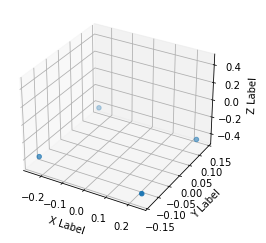

Time diff:  265.0
Footstep timestamp:  1816626.0
Height check index:  6721
Height check timestamp:  1816725.0

FL moving: 0.10093399999999997. FR moving: 0.0002550000000000052
RL moving: 0.00020799999999998597. RR moving: 0.10082399999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413255
RR moving: -0.411. RL moving: -0.310066

Coord FR: [0.239, -0.137, -0.413]. Coord FL: [0.241, 0.123, -0.411]. Coord RR: [-0.248, -0.122, -0.413]. Coord RL: [-0.244, 0.139, -0.417]

FR step_size x: 0.012054999999999982. FR step_size y: 0.014494000000000007. RL step_size x: 0.012017. RL step_size x: 0.02231999999999998.


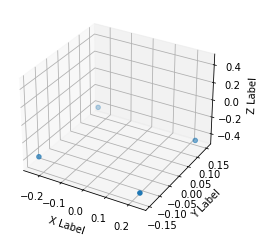

Time diff:  272.0
Footstep timestamp:  1816891.0
Height check index:  6853
Height check timestamp:  1816990.0

FL moving: 0.0025510000000000255. FR moving: 0.09778299999999995
RL moving: 0.09532799999999997. RR moving: 0.0008630000000000027

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.314217
RR moving: -0.408. RL moving: -0.410551

Coord FR: [0.229, -0.146, -0.412]. Coord FL: [0.239, 0.129, -0.408]. Coord RR: [-0.24, -0.131, -0.412]. Coord RL: [-0.24, 0.153, -0.414]

FR step_size x: 0.009645999999999988. FR step_size y: 0.019685000000000008. RL step_size x: 0.013621000000000022. RL step_size x: 0.020022999999999985.


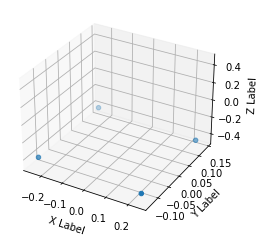

Time diff:  269.0
Footstep timestamp:  1817163.0
Height check index:  6989
Height check timestamp:  1817263.0

FL moving: 0.09947799999999996. FR moving: 0.0009959999999999969
RL moving: 0.00014900000000001024. RR moving: 0.100219

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413996
RR moving: -0.411. RL moving: -0.311522

Coord FR: [0.237, -0.135, -0.413]. Coord FL: [0.241, 0.121, -0.411]. Coord RR: [-0.248, -0.123, -0.414]. Coord RL: [-0.246, 0.141, -0.417]

FR step_size x: 0.010482999999999992. FR step_size y: 0.02262. RL step_size x: 0.013479000000000019. RL step_size x: 0.018963000000000008.


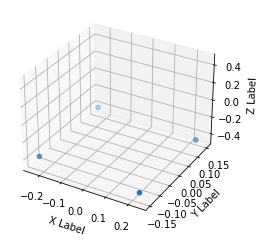

Time diff:  271.0
Footstep timestamp:  1817432.0
Height check index:  7123
Height check timestamp:  1817532.0

FL moving: 0.001825000000000021. FR moving: 0.099582
RL moving: 0.09904199999999996. RR moving: 0.0018850000000000255

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.311418
RR moving: -0.409. RL moving: -0.410825

Coord FR: [0.228, -0.148, -0.411]. Coord FL: [0.24, 0.131, -0.409]. Coord RR: [-0.24, -0.131, -0.412]. Coord RL: [-0.24, 0.152, -0.415]

FR step_size x: 0.01255400000000001. FR step_size y: 0.01862599999999999. RL step_size x: 0.011138000000000009. RL step_size x: 0.02305299999999999.


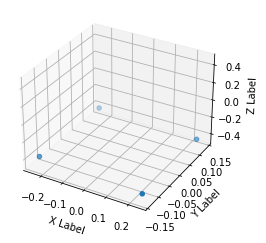

Time diff:  267.0
Footstep timestamp:  1817703.0
Height check index:  7258
Height check timestamp:  1817803.0

FL moving: 0.10052099999999997. FR moving: 0.0006070000000000242
RL moving: 4.799999999999249e-05. RR moving: 0.10120299999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413607
RR moving: -0.411. RL moving: -0.310479

Coord FR: [0.24, -0.138, -0.413]. Coord FL: [0.24, 0.123, -0.411]. Coord RR: [-0.248, -0.122, -0.414]. Coord RL: [-0.243, 0.138, -0.418]

FR step_size x: 0.011455999999999994. FR step_size y: 0.013775999999999983. RL step_size x: 0.011410999999999977. RL step_size x: 0.025562.


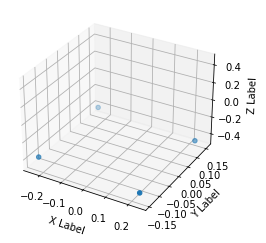

Time diff:  273.0
Footstep timestamp:  1817970.0
Height check index:  7391
Height check timestamp:  1818070.0

FL moving: 0.001855000000000051. FR moving: 0.10022699999999996
RL moving: 0.09870599999999996. RR moving: 0.0013210000000000166

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.311773
RR moving: -0.408. RL moving: -0.409855

Coord FR: [0.229, -0.145, -0.412]. Coord FL: [0.24, 0.129, -0.408]. Coord RR: [-0.24, -0.131, -0.413]. Coord RL: [-0.24, 0.155, -0.415]

FR step_size x: 0.014064999999999994. FR step_size y: 0.015533000000000005. RL step_size x: 0.009812000000000015. RL step_size x: 0.023043000000000008.


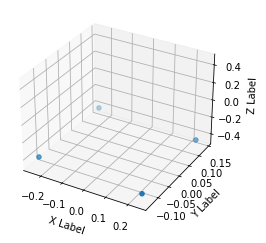

Time diff:  265.0
Footstep timestamp:  1818243.0
Height check index:  7527
Height check timestamp:  1818343.0

FL moving: 0.10196299999999997. FR moving: 0.0005480000000000484
RL moving: 2.9000000000001247e-05. RR moving: 0.10324099999999997

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413548
RR moving: -0.41. RL moving: -0.308037

Coord FR: [0.241, -0.136, -0.413]. Coord FL: [0.242, 0.122, -0.41]. Coord RR: [-0.247, -0.122, -0.415]. Coord RL: [-0.243, 0.141, -0.418]

FR step_size x: 0.014623999999999998. FR step_size y: 0.01921299999999998. RL step_size x: 0.010244999999999976. RL step_size x: 0.020120000000000027.


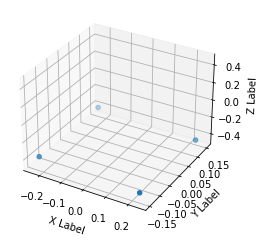

Time diff:  273.0
Footstep timestamp:  1818508.0
Height check index:  7659
Height check timestamp:  1818608.0

FL moving: 0.0022140000000000493. FR moving: 0.09849799999999997
RL moving: 0.09770999999999996. RR moving: 0.0009220000000000339

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.312502
RR moving: -0.408. RL moving: -0.410214

Coord FR: [0.229, -0.147, -0.411]. Coord FL: [0.24, 0.13, -0.408]. Coord RR: [-0.24, -0.131, -0.413]. Coord RL: [-0.24, 0.152, -0.416]

FR step_size x: 0.012638999999999984. FR step_size y: 0.017407999999999993. RL step_size x: 0.01009400000000002. RL step_size x: 0.021633000000000013.


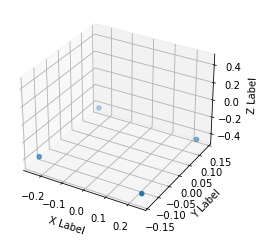

Time diff:  267.0
Footstep timestamp:  1818781.0
Height check index:  7795
Height check timestamp:  1818881.0

FL moving: 0.10128299999999996. FR moving: 0.0005249999999999977
RL moving: 0.00017800000000001148. RR moving: 0.10078399999999998

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.413. FR later: -0.413525
RR moving: -0.411. RL moving: -0.309717

Coord FR: [0.24, -0.137, -0.413]. Coord FL: [0.242, 0.123, -0.411]. Coord RR: [-0.247, -0.122, -0.414]. Coord RL: [-0.243, 0.139, -0.418]

FR step_size x: 0.013113999999999987. FR step_size y: 0.014963999999999977. RL step_size x: 0.010524999999999979. RL step_size x: 0.025267999999999985.


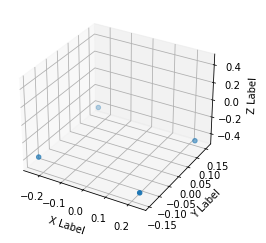

Time diff:  273.0
Footstep timestamp:  1819048.0
Height check index:  7928
Height check timestamp:  1819148.0

FL moving: 0.001479000000000008. FR moving: 0.09952
RL moving: 0.09889399999999998. RR moving: 0.0012440000000000229

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.411. FR later: -0.31148
RR moving: -0.408. RL moving: -0.409479

Coord FR: [0.229, -0.145, -0.411]. Coord FL: [0.24, 0.13, -0.408]. Coord RR: [-0.24, -0.131, -0.413]. Coord RL: [-0.239, 0.156, -0.415]

FR step_size x: 0.013741000000000003. FR step_size y: 0.015355999999999995. RL step_size x: 0.01056600000000002. RL step_size x: 0.024443000000000006.


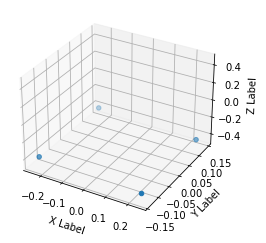

Time diff:  265.0
Footstep timestamp:  1819321.0
Height check index:  8063
Height check timestamp:  1819420.0

FL moving: 0.09995399999999999. FR moving: 0.0013820000000000499
RL moving: 0.0007530000000000037. RR moving: 0.10159099999999999

FL moving: True. FR moving: False
RL moving: False. RR moving: True

FR before: -0.412. FR later: -0.413382
RR moving: -0.409. RL moving: -0.309046

Coord FR: [0.24, -0.137, -0.412]. Coord FL: [0.243, 0.123, -0.409]. Coord RR: [-0.246, -0.122, -0.415]. Coord RL: [-0.243, 0.141, -0.419]

FR step_size x: 0.014775999999999984. FR step_size y: 0.013444999999999985. RL step_size x: 0.009292999999999996. RL step_size x: 0.02324800000000002.


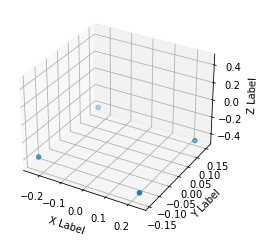

Time diff:  273.0
Footstep timestamp:  1819586.0
Height check index:  8195
Height check timestamp:  1819685.0

FL moving: 0.001747000000000054. FR moving: 0.09798599999999996
RL moving: 0.09606599999999998. RR moving: 0.0011290000000000466

FL moving: False. FR moving: True
RL moving: True. RR moving: False

FR before: -0.412. FR later: -0.314014
RR moving: -0.407. RL moving: -0.408747

Coord FR: [0.228, -0.145, -0.412]. Coord FL: [0.24, 0.129, -0.407]. Coord RR: [-0.24, -0.131, -0.413]. Coord RL: [-0.24, 0.155, -0.415]

FR step_size x: 0.015037999999999996. FR step_size y: 0.016195999999999988. RL step_size x: 0.008748000000000006. RL step_size x: 0.02444400000000002.


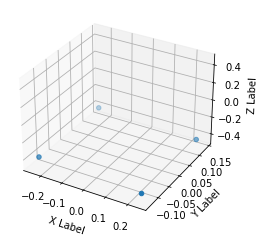

In [59]:
def visualize_absolute_foostep_sizes(dataset, footsteps, threshold=0.04):    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 32:44] = np.round(dataset[footstep, 32:44], 3)
                    
        # 3D positions
        xs = np.array([dataset[footstep, 32], dataset[footstep, 35], dataset[footstep, 38], dataset[footstep, 41]])
        ys = np.array([dataset[footstep, 33], dataset[footstep, 36], dataset[footstep, 39], dataset[footstep, 42]])
        zs = np.array([dataset[footstep, 34], dataset[footstep, 37], dataset[footstep, 40], dataset[footstep, 43]])    

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
        
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
        
            print("Time diff: ", time_diff)

            if time_diff < 300:
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34])
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37])
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40])
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43])
                
                print("Footstep timestamp: ", dataset[footstep, 0])
                print("Height check index: ", idx_height_check)
                print("Height check timestamp: ", dataset[idx_height_check, 0])

                print(f'\nFL moving: {fl_moving}. FR moving: {fr_moving}')
                print(f'RL moving: {rl_moving}. RR moving: {rr_moving}')

                print(f'\nFL moving: {fl_moving > threshold}. FR moving: {fr_moving > threshold}')
                print(f'RL moving: {rl_moving > threshold}. RR moving: {rr_moving > threshold}')
                
                print(f'\nFR before: {dataset[footstep, 34]}. FR later: {dataset[idx_height_check, 34]}')
                print(f'RR moving: {dataset[footstep, 37]}. RL moving: {dataset[idx_height_check, 37]}')

                assert (fr_moving > threshold) == (rl_moving > threshold)
                assert (rr_moving > threshold) == (fl_moving > threshold)
                assert (fr_moving > threshold) != (fl_moving > threshold)
                
                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fr_movement_y = abs(abs(dataset[footstep, 33]) - abs(dataset[footsteps[idx+1], 33]))
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                fl_movement_y = abs(abs(dataset[footstep, 36]) - abs(dataset[footsteps[idx+1], 36]))
                
                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rr_movement_y = abs(abs(dataset[footstep, 39]) - abs(dataset[footsteps[idx+1], 39]))
                
                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                rl_movement_y = abs(abs(dataset[footstep, 42]) - abs(dataset[footsteps[idx+1], 42]))
                
                
                print(f'\nCoord FR: {[xs[0], ys[0], zs[0]]}. Coord FL: {[xs[1], ys[1], zs[1]]}. Coord RR: {[xs[2], ys[2], zs[2]]}. Coord RL: {[xs[3], ys[3], zs[3]]}')
                
                if fr_moving:
                    print(f'\nFR step_size x: {fr_movement_x + fl_movement_x}. FR step_size y: {fr_movement_y + fl_movement_y}. RL step_size x: {rl_movement_x + rr_movement_x}. RL step_size x: {rl_movement_y + rr_movement_y}.')
                elif fl_moving:
                    print(f'\nFL step_size x: {fr_movement_x + fl_movement_x}. FL step_size y: {fr_movement_y + fl_movement_y}. RR step_size x: {rl_movement_x + rr_movement_x}. RR step_size x: {rl_movement_y + rr_movement_y}.')
                else:
                    print("\nERROR")

visualize_absolute_foostep_sizes(motion_01_clock, footsteps_01_clock)

### Forward motion

In [ ]:
anim = visualize_animated_footsteps(motion_01_fwd, footsteps_01_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

In [ ]:
anim = visualize_animated_footsteps(motion_01_bwd, footsteps_01_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

In [ ]:
anim = visualize_animated_footsteps(motion_01_side_right, footsteps_01_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

In [ ]:
anim = visualize_animated_footsteps(motion_01_side_left, footsteps_01_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_01_clock, footsteps_01_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

In [ ]:
anim = visualize_animated_footsteps(motion_01_count, footsteps_01_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [61]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

In [65]:
def create_timestamp_consistent_dataset(dataset, footsteps):
    # Footsteps sizes
    inputs = []
    labels = []
        
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 300:
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                labels.append(dataset[footsteps[idx], 32:44])
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_01_fwd_3D, Y_motion_01_fwd_3D = create_timestamp_consistent_dataset(motion_01_fwd, footsteps_01_fwd)
X_motion_01_bwd_3D, Y_motion_01_bwd_3D = create_timestamp_consistent_dataset(motion_01_bwd, footsteps_01_bwd)
X_motion_01_clock_3D, Y_motion_01_clock_3D = create_timestamp_consistent_dataset(motion_01_clock, footsteps_01_clock)
X_motion_01_count_3D, Y_motion_01_count_3D = create_timestamp_consistent_dataset(motion_01_count, footsteps_01_count)
X_motion_01_side_left_3D, Y_motion_01_side_left_3D = create_timestamp_consistent_dataset(motion_01_side_left, footsteps_01_side_left)
X_motion_01_side_right_3D, Y_motion_01_side_right_3D = create_timestamp_consistent_dataset(motion_01_side_right, footsteps_01_side_right)

# Stack datasets
X_motion_01_3D = np.concatenate((X_motion_01_fwd_3D, X_motion_01_bwd_3D, X_motion_01_side_right_3D, X_motion_01_side_left_3D, X_motion_01_clock_3D, X_motion_01_count_3D))
Y_motion_01_3D = np.concatenate((Y_motion_01_fwd_3D, Y_motion_01_bwd_3D, Y_motion_01_side_right_3D, Y_motion_01_side_left_3D, Y_motion_01_clock_3D, Y_motion_01_count_3D))

In [76]:
%store X_motion_01_3D
%store Y_motion_01_3D

Stored 'X_motion_01_3D' (ndarray)
Stored 'Y_motion_01_3D' (ndarray)


In [66]:
def create_timestamp_consistent_dataset_with_step_size_labels(dataset, footsteps, threshold=0.04):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 300:
                # Input (command, state, x/y/z position for each foot)
                #inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + dataset[footsteps[idx-1], 32:44].tolist())
                
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 100))
                idx_height_check = absolute_val_array.argmin()
                
                fr_moving = np.abs(dataset[footstep, 34] - dataset[idx_height_check, 34]) > threshold
                fl_moving = np.abs(dataset[footstep, 37] - dataset[idx_height_check, 37]) > threshold
                rr_moving = np.abs(dataset[footstep, 40] - dataset[idx_height_check, 40]) > threshold
                rl_moving = np.abs(dataset[footstep, 43] - dataset[idx_height_check, 43]) > threshold

                assert fr_moving == rl_moving
                assert rr_moving == fl_moving
                assert fr_moving != fl_moving
                
                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 32]) - abs(dataset[footsteps[idx+1], 32]))
                fr_movement_y = abs(abs(dataset[footstep, 33]) - abs(dataset[footsteps[idx+1], 33]))
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 35]) - abs(dataset[footsteps[idx+1], 35]))
                fl_movement_y = abs(abs(dataset[footstep, 36]) - abs(dataset[footsteps[idx+1], 36]))
                
                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 38]) - abs(dataset[footsteps[idx+1], 38]))
                rr_movement_y = abs(abs(dataset[footstep, 39]) - abs(dataset[footsteps[idx+1], 39]))
                
                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 41]) - abs(dataset[footsteps[idx+1], 41]))
                rl_movement_y = abs(abs(dataset[footstep, 42]) - abs(dataset[footsteps[idx+1], 42]))
                
                label = []
                                
                if fr_moving:
                    label.append([fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, 0, 0, 0, 0, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y])
                elif fl_moving:
                    label.append([0, 0, fr_movement_x + fl_movement_x, fr_movement_y + fl_movement_y, rr_movement_x + rl_movement_x, rr_movement_y + rl_movement_y, 0, 0])
                else:
                    print("\nERROR")
                    
                labels.append(label)
                inputs.append(dataset[footsteps[idx-1], 2:5].tolist() + dataset[footsteps[idx-1], 25:28].tolist() + [int(fr_moving), int(fl_moving), int(rr_moving), int(rl_moving)])
                
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy.reshape(labels_numpy.shape[0], labels_numpy.shape[2])

X_motion_01_fwd_step, Y_motion_01_fwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_01_fwd, footsteps_01_fwd)
X_motion_01_bwd_step, Y_motion_01_bwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_01_bwd, footsteps_01_bwd)
X_motion_01_clock_step, Y_motion_01_clock_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_01_clock, footsteps_01_clock)
X_motion_01_count_step, Y_motion_01_count_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_01_count, footsteps_01_count)
X_motion_01_side_left_step, Y_motion_01_side_left_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_01_side_left, footsteps_01_side_left)
X_motion_01_side_right_step, Y_motion_01_side_right_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_01_side_right, footsteps_01_side_right)

# Stack datasets
X_motion_01_step = np.concatenate((X_motion_01_fwd_step, X_motion_01_bwd_step, X_motion_01_side_right_step, X_motion_01_side_left_step, X_motion_01_clock_step, X_motion_01_count_step))
Y_motion_01_step = np.concatenate((Y_motion_01_fwd_step, Y_motion_01_bwd_step, Y_motion_01_side_right_step, Y_motion_01_side_left_step, Y_motion_01_clock_step, Y_motion_01_count_step))

In [67]:
%store X_motion_01_step
%store Y_motion_01_step

Stored 'X_motion_01_step' (ndarray)
Stored 'Y_motion_01_step' (ndarray)


In [75]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} motion\n')
    
    # Find all positive movements in x and y for FR
    fr_steps_x = np.where(dataset[:, 0] > 0)[0]
    fr_steps_y = np.where(dataset[:, 1] > 0)[0]
    
    # Find all positive movements in x and y for FR
    fl_steps_x = np.where(dataset[:, 2] > 0)[0]
    fl_steps_y = np.where(dataset[:, 3] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rr_steps_x = np.where(dataset[:, 4] > 0)[0]
    rr_steps_y = np.where(dataset[:, 5] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rl_steps_x = np.where(dataset[:, 6] > 0)[0]
    rl_steps_y = np.where(dataset[:, 7] > 0)[0]
    
    # Compute stats for FR foot
    print(f'FR mean x step: {np.mean(dataset[fr_steps_x, 0])}. FR std x step: {np.std(dataset[fr_steps_x, 0])}. FR mean y step: {np.mean(dataset[fr_steps_y, 1])}. FR std y step: {np.mean(dataset[fr_steps_y, 1])}')
 
    # Compute stats for FL foot
    print(f'FL mean x step: {np.mean(dataset[fl_steps_x, 2])}. FL std x step: {np.std(dataset[fl_steps_x, 2])}. FL mean y step: {np.mean(dataset[fl_steps_y, 3])}. FL std y step: {np.mean(dataset[fl_steps_y, 3])}')
    
    # Compute stats for RR foot
    print(f'RR mean x step: {np.mean(dataset[rr_steps_x, 4])}. RR std x step: {np.std(dataset[rr_steps_x, 4])}. RR mean y step: {np.mean(dataset[rr_steps_y, 5])}. RR std y step: {np.mean(dataset[rr_steps_y, 5])}')
    
    # Compute stats for RL foot
    print(f'RL mean x step: {np.mean(dataset[rl_steps_x, 6])}. RL std x step: {np.std(dataset[rl_steps_x, 6])}. RL mean y step: {np.mean(dataset[rl_steps_y, 7])}. RL std y step: {np.mean(dataset[rl_steps_y, 7])}\n')
    
labels_stats(Y_motion_01_fwd_step, "forward")
labels_stats(Y_motion_01_bwd_step, "backward")
labels_stats(Y_motion_01_clock_step, "clockwise")
labels_stats(Y_motion_01_count_step, "counter clockwise")
labels_stats(Y_motion_01_side_left_step, "left step")
labels_stats(Y_motion_01_side_right_step, "right step")

Statistics for forward motion

FR mean x step: 0.08645104651162792. FR std x step: 0.008393493653942138. FR mean y step: 0.006441046511627905. FR std y step: 0.006441046511627905
FL mean x step: 0.08475714942528735. FL std x step: 0.01009944666918188. FL mean y step: 0.007199057471264366. FL std y step: 0.007199057471264366
RR mean x step: 0.08315088505747127. RR std x step: 0.010255888558516967. RR mean y step: 0.008548517241379307. RR std y step: 0.008548517241379307
RL mean x step: 0.08486129069767441. RL std x step: 0.007429521664258133. RL mean y step: 0.00729856976744186. RL std y step: 0.00729856976744186

Statistics for backward motion

FR mean x step: 0.01708402272727273. FR std x step: 0.0025120693524068277. FR mean y step: 0.025450068181818174. FR std y step: 0.025450068181818174
FL mean x step: 0.017240953488372093. FL std x step: 0.0025900304654173766. FL mean y step: 0.025655046511627908. FL std y step: 0.025655046511627908
RR mean x step: 0.02243704651162791. RR std x st